In [ ]:
## NEED TO USED GADI JUPYTER - 4 nodes with 250gb mem total

In [1]:
## u_along figure

In [1]:
import cosima_cookbook as cc
from dask.distributed import Client
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import numpy as np

import xarray as xr
import cmocean as cm
import cartopy.crs as ccrs
import cmocean as cm
import glob
import os

In [2]:
import matplotlib.dates as mdates
import datetime
import pandas as pd

In [3]:
%matplotlib inline

In [4]:
from matplotlib import rc
rc('font', **{'size':25})
rc('text', usetex=False)
rc('xtick', labelsize=25) #20 
rc('ytick', labelsize=25) #20
rc('axes', titlesize=25)    # fontsize of the axes title
rc('axes', labelsize=25) #24    # fontsize of the x and y labels

In [5]:
session=cc.database.create_session()
expt = '01deg_jra55v13_ryf9091'

In [6]:
import dask.config
from dask.distributed import Client,LocalCluster
from dask_jobqueue import PBSCluster

walltime = '01:00:00'
cores = 28

memory = '252GB'

cluster = PBSCluster(walltime=str(walltime), cores=cores, memory=str(memory),processes=cores,
                     job_extra=['-q normalbw','-P v45','-l ncpus='+str(cores),'-l mem='+str(memory),
                                '-l storage=gdata/ik11+gdata/e14+gdata/hh5+gdata/v45+gdata/cj50',
                                '-l jobfs=400GB'],
                     local_directory='$TMPDIR',
                     header_skip=["select"],
                     #python=os.environ["DASK_PYTHON"]
                    )
cluster

# and if you want even more power, you can use this to make it three nodes
cluster.scale(jobs=3)

# then, run this to make a dask client

c = Client(cluster)
c

<Client: 'tcp://10.6.121.5:46169' processes=0 threads=0, memory=0 B>

In [40]:
hu = cc.querying.getvar(expt='01deg_jra55v13_ryf9091', variable='hu', 
                          session=session, frequency='static',
                          attrs={'cell_methods': 'time: point'}, n=1).sel(yu_ocean = slice(-79,-60)).chunk({ 'yu_ocean':69, 'xu_ocean':360})
hu

<xarray.DataArray 'hu' (yu_ocean: 440, xu_ocean: 3600)> Size: 6MB
dask.array<rechunk-merge, shape=(440, 3600), dtype=float32, chunksize=(69, 360), chunktype=numpy.ndarray>
Coordinates:
  * xu_ocean  (xu_ocean) float64 29kB -279.9 -279.8 -279.7 ... 79.8 79.9 80.0
  * yu_ocean  (yu_ocean) float64 4kB -78.98 -78.93 -78.89 ... -60.07 -60.02
    geolon_c  (yu_ocean, xu_ocean) float32 6MB dask.array<chunksize=(69, 360), meta=np.ndarray>
    geolat_c  (yu_ocean, xu_ocean) float32 6MB dask.array<chunksize=(69, 360), meta=np.ndarray>
Attributes:
    long_name:     ocean depth on u-cells
    units:         m
    valid_range:   [-1.e+09  1.e+09]
    cell_methods:  time: point
    ncfiles:       ['/g/data/ik11/outputs/access-om2-01/01deg_jra55v13_ryf909...
    contact:       Andy Hogg
    email:         andy.hogg@anu.edu.au
    created:       2020-06-11
    description:   0.1 degree ACCESS-OM2 global model configuration with JRA5...
    notes:         Additional daily outputs saved from 1 Jan 1950 to 31 Dec 1...
    url:           https://github.com/COSIMA/01deg_jra55_ryf/tree/01deg_jra55...

In [41]:
# location limits of dataset - choosing slice near totten
#lon_lim = slice(-270, -230) #slice(30, 45)#
lat_lim = slice(-79, -60) #slice(-70, -65)

hu_region = hu.sel( yu_ocean = lat_lim)

## making ualong decade average fields


In [13]:

exp_ctrl= '01deg_jra55v13_ryf9091'
exp_wthmp= '01deg_jra55v13_ryf9091_qian_wthmp'
exp_wthp= '01deg_jra55v13_ryf9091_qian_wthp'
lat_lim = slice(-79, -60)
lon_lim = slice(-279.99,80)

#### SET EXPT HERE
expt = exp_ctrl


In [14]:
u = xr.open_mfdataset('/g/data/v45/qo9901/MW-perturb-ASC-data/u_monthly_field' + expt +'.nc').ug_s
v = xr.open_mfdataset('/g/data/v45/qo9901/MW-perturb-ASC-data/v_monthly_field' + expt +'.nc').vg_s

In [15]:
## plotting everything together
cluster_mask_access = xr.open_mfdataset('Antarctic-Eddy-Res-Compare/largest_3cluster_mask_xr_accessom201.nc')
cluster_mask_access= cluster_mask_access.assign_coords(xu_ocean = ('xu_ocean', u.xu_ocean.data), yu_ocean = ('yu_ocean', u.yu_ocean.data))
#calculating area on shelf and slope total
area_u = cc.querying.getvar(expt='01deg_jra55v13_ryf9091', variable='area_u', 
                          session=session, frequency='static',
                          attrs={'cell_methods': 'time: point'}, n=1).sel(xu_ocean= lon_lim, yu_ocean = lat_lim)
circ_area_slope = (area_u*cluster_mask_access.where(mask_slope ==True)).sum().__xarray_dataarray_variable__.values                                                                                                                                                                                           
circ_area_shelf = (area_u*cluster_mask_access.where(mask_shelf ==True)).sum().__xarray_dataarray_variable__.values                                                                                                                                                                                           
circ_area_total = (area_u*cluster_mask_access).sum().__xarray_dataarray_variable__.values                                                                                                                                                                                           


NameError: name 'mask_slope' is not defined

In [73]:
u

<xarray.DataArray 'ug_s' (yu_ocean: 440, xu_ocean: 3600, time: 600)> Size: 8GB
dask.array<open_dataset-ug_s, shape=(440, 3600, 600), dtype=float64, chunksize=(440, 3600, 600), chunktype=numpy.ndarray>
Coordinates:
  * xu_ocean  (xu_ocean) float64 29kB -279.9 -279.8 -279.7 ... 79.8 79.9 80.0
  * yu_ocean  (yu_ocean) float64 4kB -78.98 -78.93 -78.89 ... -60.07 -60.02
    geolon_c  (yu_ocean, xu_ocean) float32 6MB dask.array<chunksize=(440, 3600), meta=np.ndarray>
    geolat_c  (yu_ocean, xu_ocean) float32 6MB dask.array<chunksize=(440, 3600), meta=np.ndarray>
  * time      (time) object 5kB 2110-01-16 12:00:00 ... 2159-12-16 12:00:00
Attributes:
    standard_name:  surface_geostrophic_eastward_sea_water_velocity
    long_name:      $u_g,s$
    units:          $\mathrm{ms}^{-1}$

In [14]:
mask_shelf = xr.where(hu<1000 , True, False)
mask_slope = xr.where(hu>1000, True, False)

In [15]:
# defining B-grid using xgcm
path_to_folder = '/g/data/ik11/outputs/access-om2-01/01deg_jra55v13_ryf9091/output000/ocean/'
ocean_grid = xr.open_mfdataset(path_to_folder+'ocean_grid.nc', combine='by_coords')

In [17]:
# NEEDload coordinates and grid specifications
geolat_t = cc.querying.getvar(expt, 'geolat_t', session=session, n=1)
geolon_t = cc.querying.getvar(expt, 'geolon_t', session=session, n=1)

dxt = cc.querying.getvar(expt=expt, variable='dxt', session=session, frequency='static', n=1)
dyt = cc.querying.getvar(expt=expt, variable='dyt', session=session, frequency='static', n=1)

dxu = cc.querying.getvar(expt=expt, variable='dxu', session=session, frequency='static', n=1)
dyu = cc.querying.getvar(expt=expt, variable='dyu', session=session, frequency='static', n=1)

In [18]:
#sea_level_lim = sea_level.sel( xt_ocean= lon_lim, yt_ocean=lat_lim, time = flex_period)

# coordinates
lat_t = geolat_t.sel( xt_ocean= lon_lim,yt_ocean=lat_lim)
lon_t = geolon_t.sel(xt_ocean= lon_lim, yt_ocean=lat_lim)

dxt_lim = dxt.sel(xt_ocean= lon_lim,yt_ocean=lat_lim)
dyt_lim = dyt.sel(xt_ocean= lon_lim,yt_ocean=lat_lim)

dxu_lim = dxu.sel(xu_ocean= lon_lim,yu_ocean=lat_lim)
dyu_lim = dyu.sel(xu_ocean= lon_lim,yu_ocean=lat_lim)

In [19]:
## need to run seperately or it will crash
import xgcm
coordinates = xr.merge([dxt_lim, dyt_lim, dxu_lim, dyu_lim])

In [74]:
vel = xr.merge([hu,coordinates, u, v, ocean_grid.sel(xt_ocean= lon_lim,xu_ocean= lon_lim, yt_ocean=lat_lim, yu_ocean = lat_lim).isel(time = 0)],compat='override')# time is flex_period before

In [75]:
vel.coords['xt_ocean'].attrs.update(axis='X')
vel.coords['xu_ocean'].attrs.update(axis='X', c_grid_axis_shift=0.5, periodic=True)
vel.coords['yt_ocean'].attrs.update(axis='Y')
vel.coords['yu_ocean'].attrs.update(axis='Y', c_grid_axis_shift=0.5)
metrics = {
    ('X',): ['dxt', 'dxu'], # X distances
    ('Y',): ['dyt', 'dyu'], # Y distances
    ('X', 'Y'): ['area_t', 'area_u'] # Areas
}

In [76]:
grid = xgcm.Grid(vel, periodic=['X'], metrics = metrics,boundary='extend')
grid

<xgcm.Grid>
X Axis (periodic, boundary='extend'):
  * center   xt_ocean --> right
  * right    xu_ocean --> center
Y Axis (not periodic, boundary='extend'):
  * center   yt_ocean --> right
  * right    yu_ocean --> center

In [23]:
# Take gradient and move to u grid
# Simple gradient over one grid cell. 
# In latitudinal direction, we need to specify what happens at the boundary.
dhu_dx = grid.interp( grid.diff(vel.hu, 'X') / grid.interp(vel.dxu, 'X'), 'X')#, 'Y', boundary='extend')
dhu_dy = grid.interp( grid.diff(vel.hu, 'Y', boundary='extend') / grid.interp(vel.dyt, 'X'), 'Y', boundary='extend')# 'X')
dhu_dx

<xarray.DataArray (yu_ocean: 440, xu_ocean: 3600)> Size: 6MB
dask.array<interp_center_to_right, shape=(440, 3600), dtype=float32, chunksize=(69, 360), chunktype=numpy.ndarray>
Coordinates:
  * xu_ocean  (xu_ocean) float64 29kB -279.9 -279.8 -279.7 ... 79.8 79.9 80.0
  * yu_ocean  (yu_ocean) float64 4kB -78.98 -78.93 -78.89 ... -60.07 -60.02

In [24]:
# Calculate the magnitude of the topographic slope
slope = np.sqrt(dhu_dx**2 + dhu_dy**2).rename('slope')

In [ ]:
## Calculation decadal means - splitting in x and then calculatingtime mean

In [77]:
def calc_u_along_decademean(tt, chunk_size, u_input, v_input):
    u_t = u_input.isel(time = slice(tt*chunk_size, chunk_size*(tt+1))).where(cluster_mask_access == True)#.where(mask_region == True).load()
    v_t = v_input.isel(time = slice(tt*chunk_size, chunk_size*(tt+1))).where(cluster_mask_access == True)#.where(mask_region == True).load()
    
    u_comp = (u_t*dhu_dy/slope).__xarray_dataarray_variable__#.compute()
    v_comp = (v_t*dhu_dx/slope).__xarray_dataarray_variable__#.compute()
    u_along = u_comp.chunk({ 'yu_ocean':100, 'xu_ocean':50}) - v_comp.chunk({ 'yu_ocean':100, 'xu_ocean':50})
    u_along_tt = u_along.mean(dim = 'time').load()#.values
    print(tt)
    return u_along_tt

In [78]:
ualong_x_tmean = []
## array of decades with ualong mean
chunk_size = 1200
for tt in range(5): # total 5 decades
    ualong_x = []
    for xx in range(3): # total 6 lon sections
        ## tt is effectively decade number with time chunk_size = 120
        ualong_x_elem = calc_u_along_decademean(tt, 120, u.isel(xu_ocean = slice(xx*chunk_size, (xx+1)*chunk_size)),\
                                                    v.isel(xu_ocean = slice(xx*chunk_size, (xx+1)*chunk_size)))
        ualong_x.append(ualong_x_elem)
    ualong_x_tmean.append(xr.merge(ualong_x))
                                            

0
0
0
1
1
1
2
2
2
3
3
3
4
4
4


In [79]:
ualong_decademean = xr.merge([ualong_x_tmean[i].assign_coords({'decade': i}).expand_dims('decade')\
                              for i in range(len(ualong_x_tmean))])
ualong_decademean = ualong_decademean.rename_vars({'__xarray_dataarray_variable__':'u_along'})
ualong_decademean = ualong_decademean.assign_attrs(
    units="m/s", description= 'Time-mean along slope velocity for each decade of MW expriment: ' + expt )
ualong_decademean

<xarray.Dataset> Size: 76MB
Dimensions:   (xu_ocean: 3600, yu_ocean: 440, decade: 5)
Coordinates:
  * xu_ocean  (xu_ocean) float64 29kB -279.9 -279.8 -279.7 ... 79.8 79.9 80.0
  * yu_ocean  (yu_ocean) float64 4kB -78.98 -78.93 -78.89 ... -60.07 -60.02
  * decade    (decade) int64 40B 0 1 2 3 4
    geolon_c  (yu_ocean, xu_ocean) float32 6MB nan nan nan ... 79.8 79.9 80.0
    geolat_c  (yu_ocean, xu_ocean) float32 6MB nan nan nan ... -60.02 -60.02
Data variables:
    u_along   (decade, yu_ocean, xu_ocean) float64 63MB nan nan nan ... nan nan
Attributes:
    units:        m/s
    description:  Time-mean along slope velocity for each decade of MW exprim...

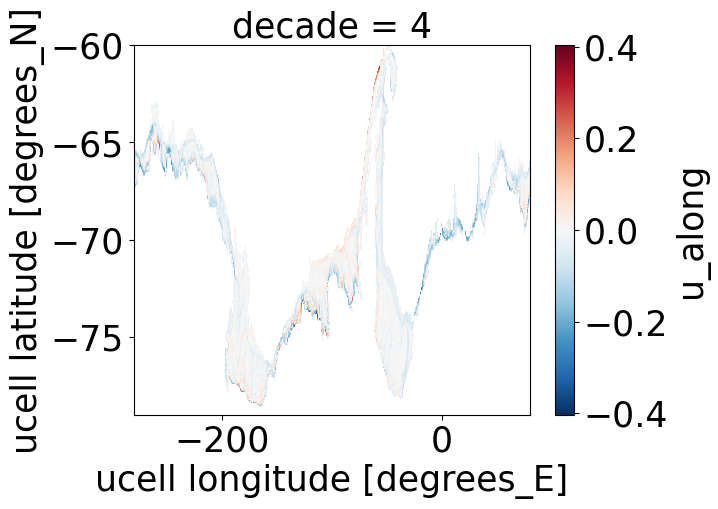

In [80]:
ualong_decademean.isel(decade = 4).u_along.plot()

In [81]:
ualong_decademean.to_netcdf('/g/data/v45/qo9901/MW-perturb-ASC-data/ualong_decademean_' + expt + '.nc')

## Plotting here and importing

In [16]:
ualong_decademean_wthmp = xr.open_mfdataset('/g/data/v45/qo9901/MW-perturb-ASC-data/ualong_decademean_' + exp_wthmp + '.nc')
ualong_decademean_wthp = xr.open_mfdataset('/g/data/v45/qo9901/MW-perturb-ASC-data/ualong_decademean_' + exp_wthp + '.nc')
ualong_decademean_ctrl = xr.open_mfdataset('/g/data/v45/qo9901/MW-perturb-ASC-data/ualong_decademean_' + exp_ctrl + '.nc')
ualong_decademean_wthmp

<xarray.Dataset> Size: 76MB
Dimensions:   (xu_ocean: 3600, yu_ocean: 440, decade: 5)
Coordinates:
  * xu_ocean  (xu_ocean) float64 29kB -279.9 -279.8 -279.7 ... 79.8 79.9 80.0
  * yu_ocean  (yu_ocean) float64 4kB -78.98 -78.93 -78.89 ... -60.07 -60.02
  * decade    (decade) int64 40B 0 1 2 3 4
    geolon_c  (yu_ocean, xu_ocean) float32 6MB dask.array<chunksize=(440, 3600), meta=np.ndarray>
    geolat_c  (yu_ocean, xu_ocean) float32 6MB dask.array<chunksize=(440, 3600), meta=np.ndarray>
Data variables:
    u_along   (decade, yu_ocean, xu_ocean) float64 63MB dask.array<chunksize=(5, 440, 3600), meta=np.ndarray>
Attributes:
    units:        m/s
    description:  Time-mean along slope velocity for each decade of MW exprim...

In [17]:
cd Antarctic-Eddy-Res-Compare

/home/561/qo9901/Antarctic-Eddy-Res-Compare


In [37]:
import cmocean
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

In [18]:
## importing masks for clusters

cluster_mask_access = xr.open_mfdataset('largest_3cluster_mask_xr_accessom201.nc')
cluster_mask_access

<xarray.Dataset> Size: 2MB
Dimensions:                        (yu_ocean: 440, xu_ocean: 3600)
Dimensions without coordinates: yu_ocean, xu_ocean
Data variables:
    __xarray_dataarray_variable__  (yu_ocean, xu_ocean) bool 2MB dask.array<chunksize=(440, 3600), meta=np.ndarray>

In [19]:
mask_bath_slopeshelf = xr.where((hu_region <2600),True,False)

In [20]:
land_mask = np.squeeze(hu.values)
land_mask = land_mask * 0
land_mask[np.isnan(land_mask)] = 1
yu_ocean = hu.yu_ocean.values
xu_ocean = hu.xu_ocean.values
land_mask_masked = np.ma.masked_where((land_mask==0),land_mask)
# make land go all the way to -90S:
land_mask_lat = hu.yu_ocean.values
land_mask_lat[0] = -80


In [21]:
levels_ualong = np.arange(-0.11,0.11,0.01)


In [22]:
def changeline_cs(linestyle):
    cs.monochrome = True
    for col,  ls in zip(cs.collections,cs._process_linestyles(linestyle)):
        col.set_linestyle(ls)
        col.set_edgecolor('k')
        #col.set_linewidth(2)


In [43]:
hu_region = hu_region#.where(cluster_mask_access == True)
hu_region

<xarray.DataArray 'hu' (yu_ocean: 440, xu_ocean: 3600)> Size: 6MB
dask.array<rechunk-merge, shape=(440, 3600), dtype=float32, chunksize=(69, 360), chunktype=numpy.ndarray>
Coordinates:
  * xu_ocean  (xu_ocean) float64 29kB -279.9 -279.8 -279.7 ... 79.8 79.9 80.0
  * yu_ocean  (yu_ocean) float64 4kB -78.98 -78.93 -78.89 ... -60.07 -60.02
    geolon_c  (yu_ocean, xu_ocean) float32 6MB dask.array<chunksize=(69, 360), meta=np.ndarray>
    geolat_c  (yu_ocean, xu_ocean) float32 6MB dask.array<chunksize=(69, 360), meta=np.ndarray>
Attributes:
    long_name:     ocean depth on u-cells
    units:         m
    valid_range:   [-1.e+09  1.e+09]
    cell_methods:  time: point
    ncfiles:       ['/g/data/ik11/outputs/access-om2-01/01deg_jra55v13_ryf909...
    contact:       Andy Hogg
    email:         andy.hogg@anu.edu.au
    created:       2020-06-11
    description:   0.1 degree ACCESS-OM2 global model configuration with JRA5...
    notes:         Additional daily outputs saved from 1 Jan 1950 to 31 Dec 1...
    url:           https://github.com/COSIMA/01deg_jra55_ryf/tree/01deg_jra55...

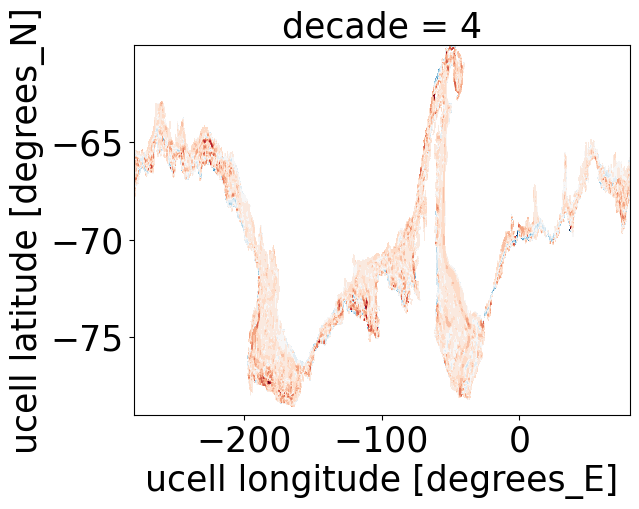

In [34]:
cmap = (ualong_decademean_wthp.u_along - ualong_decademean_ctrl.u_along).isel(decade = 4).plot.contourf(levels  = np.arange(-0.1,0.1,0.01), add_colorbar = False)


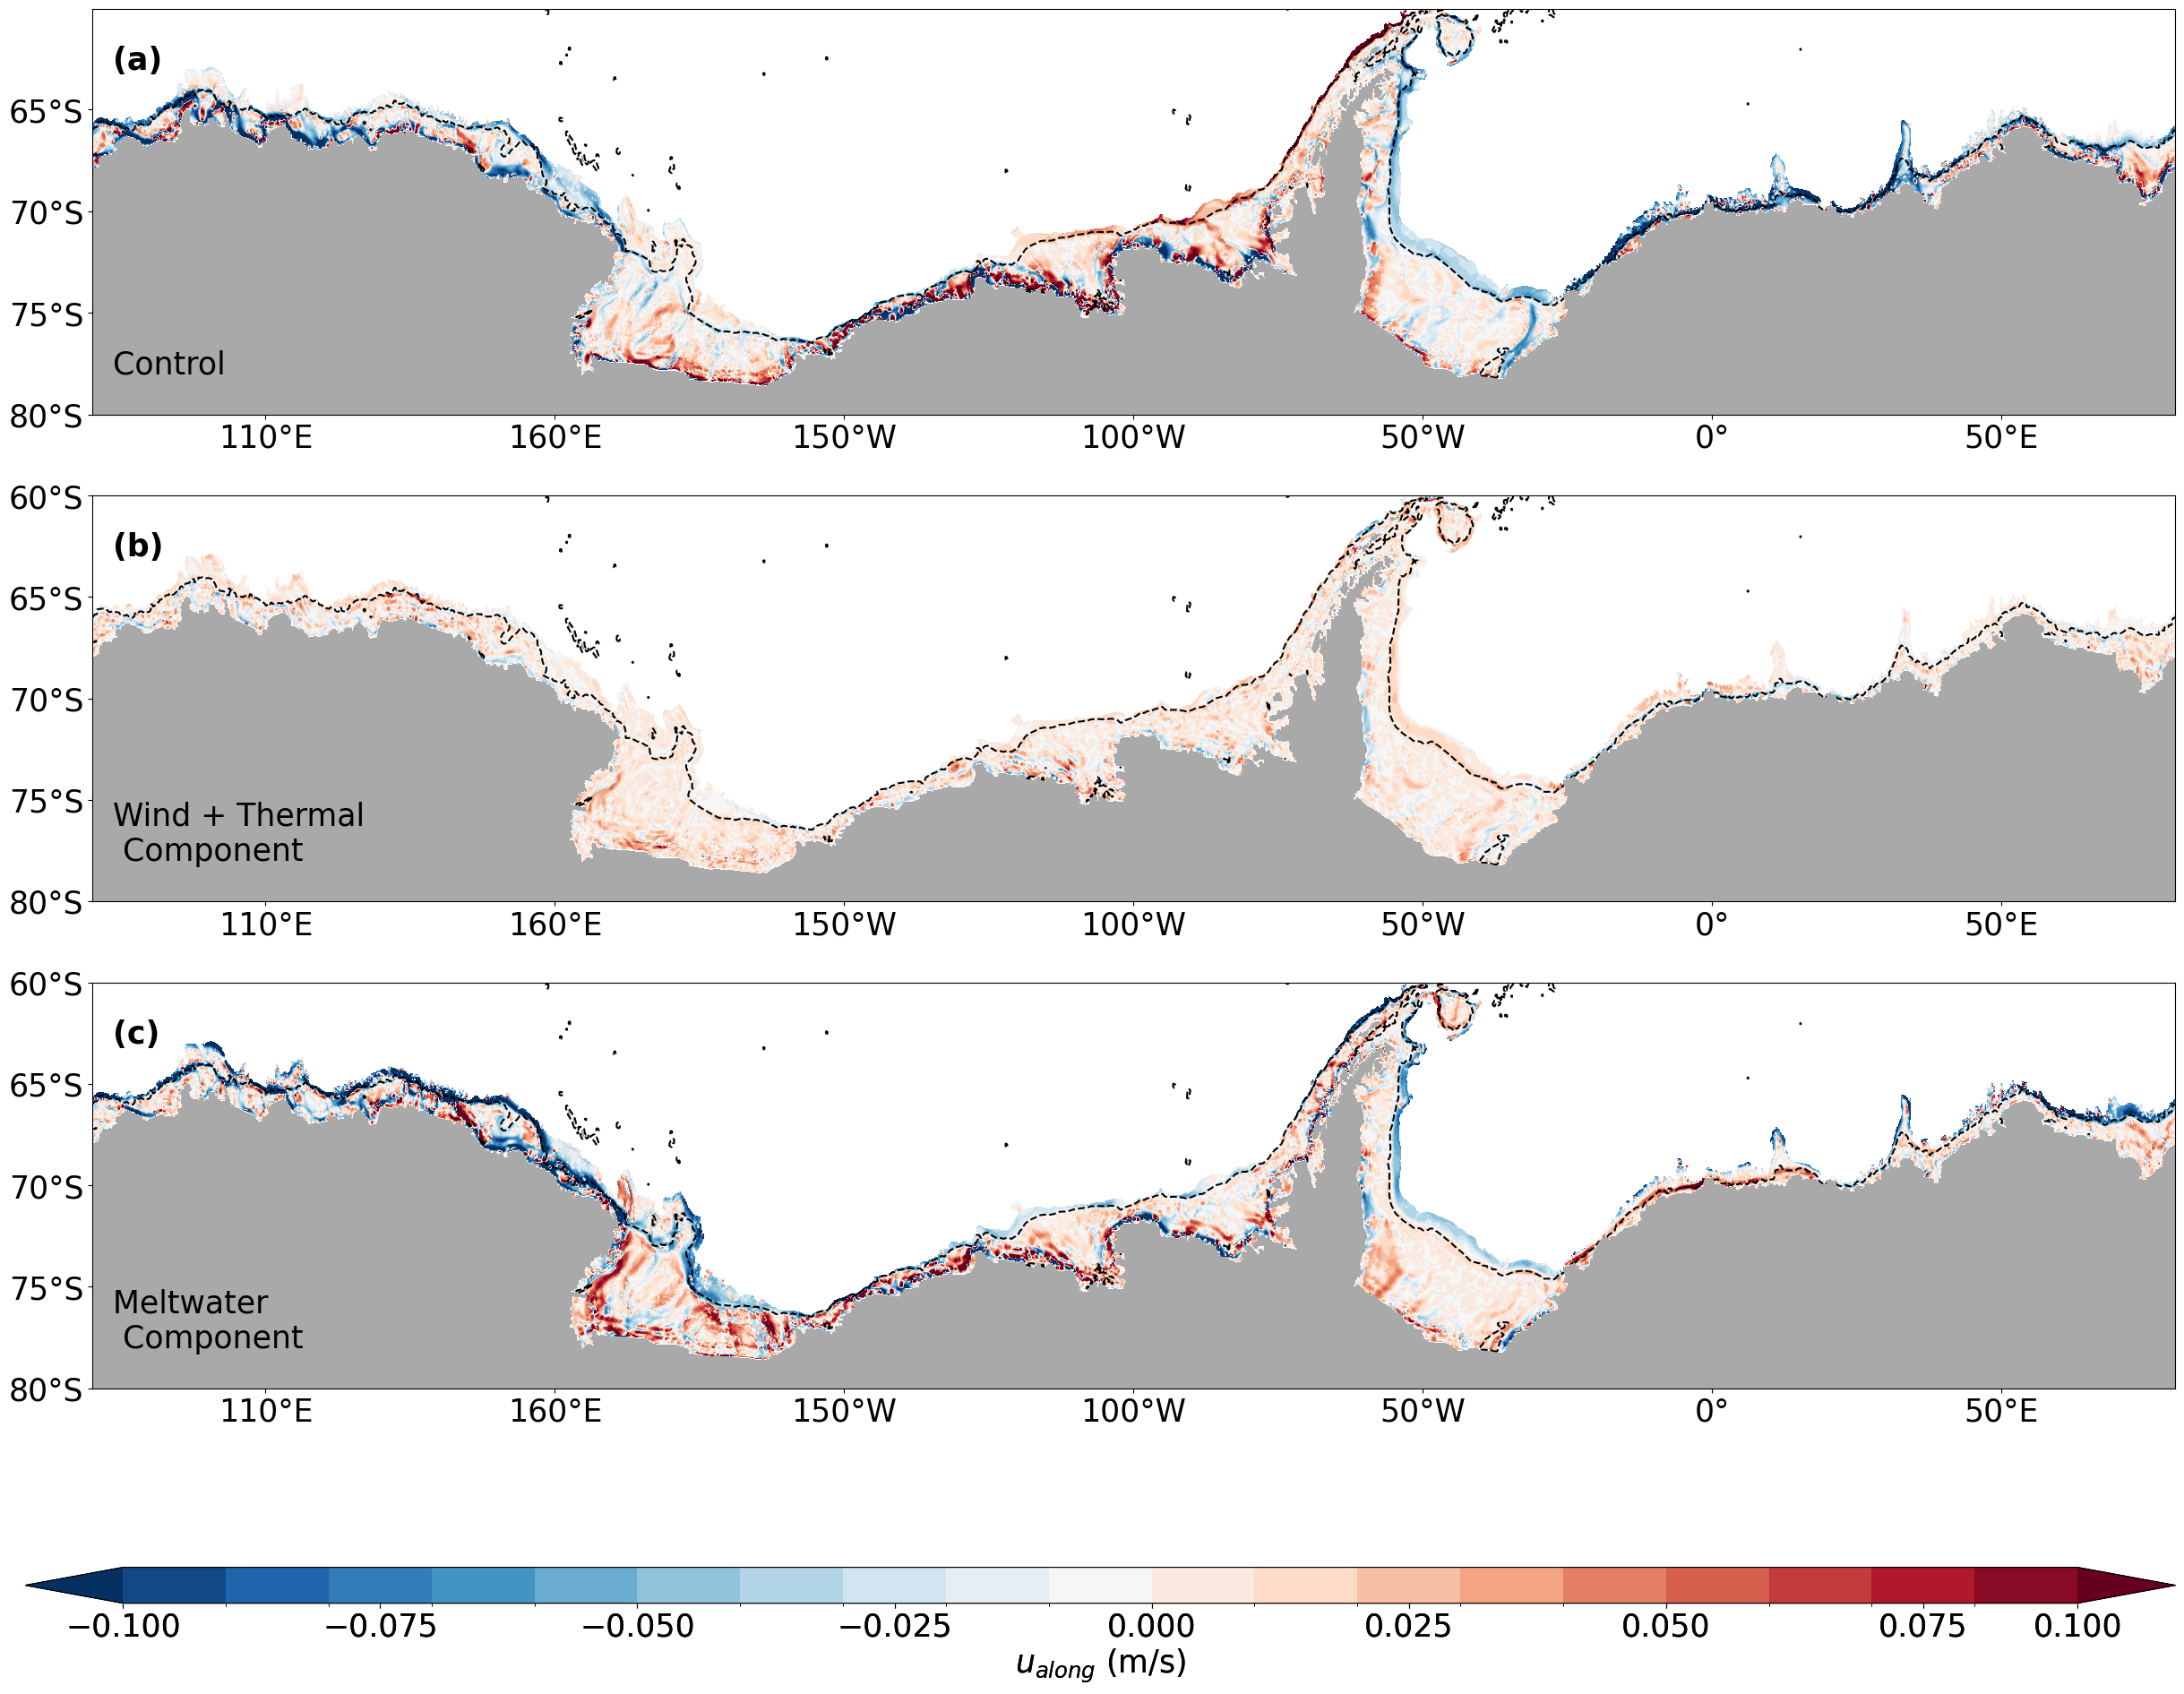

In [53]:
fig, ax = plt.subplots(nrows =3 ,figsize = (30,20))

# accessom2-01
cmap = ualong_decademean_ctrl.u_along.isel(decade = 4).plot.contourf(levels  = np.arange(-0.1,0.1,0.01), add_colorbar = False, ax = ax[0])
#cs = hu_region.where(hu_region < 2600).plot.contour(levels  = [2500], color = 'k', ax = ax[0])
#changeline_cs('solid')
cs = hu_region.plot.contour(levels  = [1000], color = 'k', ax = ax[0], linestyle = 'dashed') #conventional definition for ASC
changeline_cs('dashed')
ax[0].set_ylabel('')
ax[0].contourf(hu.xu_ocean, land_mask_lat, land_mask_masked, colors='darkgrey', zorder=2)
ax[1].text(0.01,0.1,'Control',transform=ax[0].transAxes)
ax[0].set_xlabel('')
ax[0].text(0.01,0.85,'(a)', transform=ax[0].transAxes, fontweight = 'bold')



cmap = (ualong_decademean_wthp.u_along - ualong_decademean_ctrl.u_along).isel(decade = 4).plot.contourf(levels  = np.arange(-0.1,0.1,0.01), add_colorbar = False, ax = ax[1])
#np.flip(deptho, 0).plot.contour(levels  = np.arange(0,4000,500), cmap = 'gray_r' , ax = ax[1]) # shallow is dark ' Greys deep is dark
cs = hu_region.plot.contour(levels  = [1000], color = 'k', ax = ax[1], linestyle = 'dashed') #conventional definition for ASC
changeline_cs('dashed')

ax[1].contourf(hu.xu_ocean, land_mask_lat, land_mask_masked, colors='darkgrey', zorder=2)
ax[1].set_ylim([-80,-60])
ax[1].text(0.01,0.1,'Wind + Thermal \nComponent',transform=ax[1].transAxes)
ax[1].set_ylabel('')
ax[1].set_xlabel('')
ax[1].text(0.01,0.85,'(b)', transform=ax[1].transAxes, fontweight = 'bold')

cb_ax = fig.add_axes([0.1, -0.01, 0.8, 0.02])
cbar = plt.colorbar(cmap, label = '$u_{along}$ (m/s)', orientation = 'horizontal', cax = cb_ax, pad = 0.1)
cbar.set_ticks(np.arange(-0.1,0.125,0.025))


cmap = (ualong_decademean_wthmp.u_along - ualong_decademean_wthp.u_along).isel(decade = 4).plot.contourf(levels  = np.arange(-0.1,0.1,0.01), add_colorbar = False, ax = ax[2])
#np.flip(deptho, 0).plot.contour(levels  = np.arange(0,4000,500), cmap = 'gray_r' , ax = ax[1]) # shallow is dark ' Greys deep is dark
cs = hu_region.plot.contour(levels  = [1000], color = 'k', ax = ax[2], linestyle = 'dashed') #conventional definition for ASC
changeline_cs('dashed')

ax[2].contourf(hu.xu_ocean, land_mask_lat, land_mask_masked, colors='darkgrey', zorder=2)
ax[2].set_ylim([-80,-60])
ax[2].text(0.01,0.1,'Meltwater \nComponent',transform=ax[2].transAxes)
ax[2].set_ylabel('')
ax[2].set_xlabel('')
ax[2].text(0.01,0.85,'(c)', transform=ax[2].transAxes, fontweight = 'bold')

cb_ax = fig.add_axes([0.1, -0.01, 0.8, 0.02])
cbar = plt.colorbar(cmap, label = '$u_{along}$ (m/s)', orientation = 'horizontal', cax = cb_ax, pad = 0.01)
cbar.set_ticks(np.arange(-0.1,0.125,0.025))

for box in range(3):
    ax[box].yaxis.set_major_formatter(LatitudeFormatter())
    ax[box].xaxis.set_major_formatter(LongitudeFormatter())


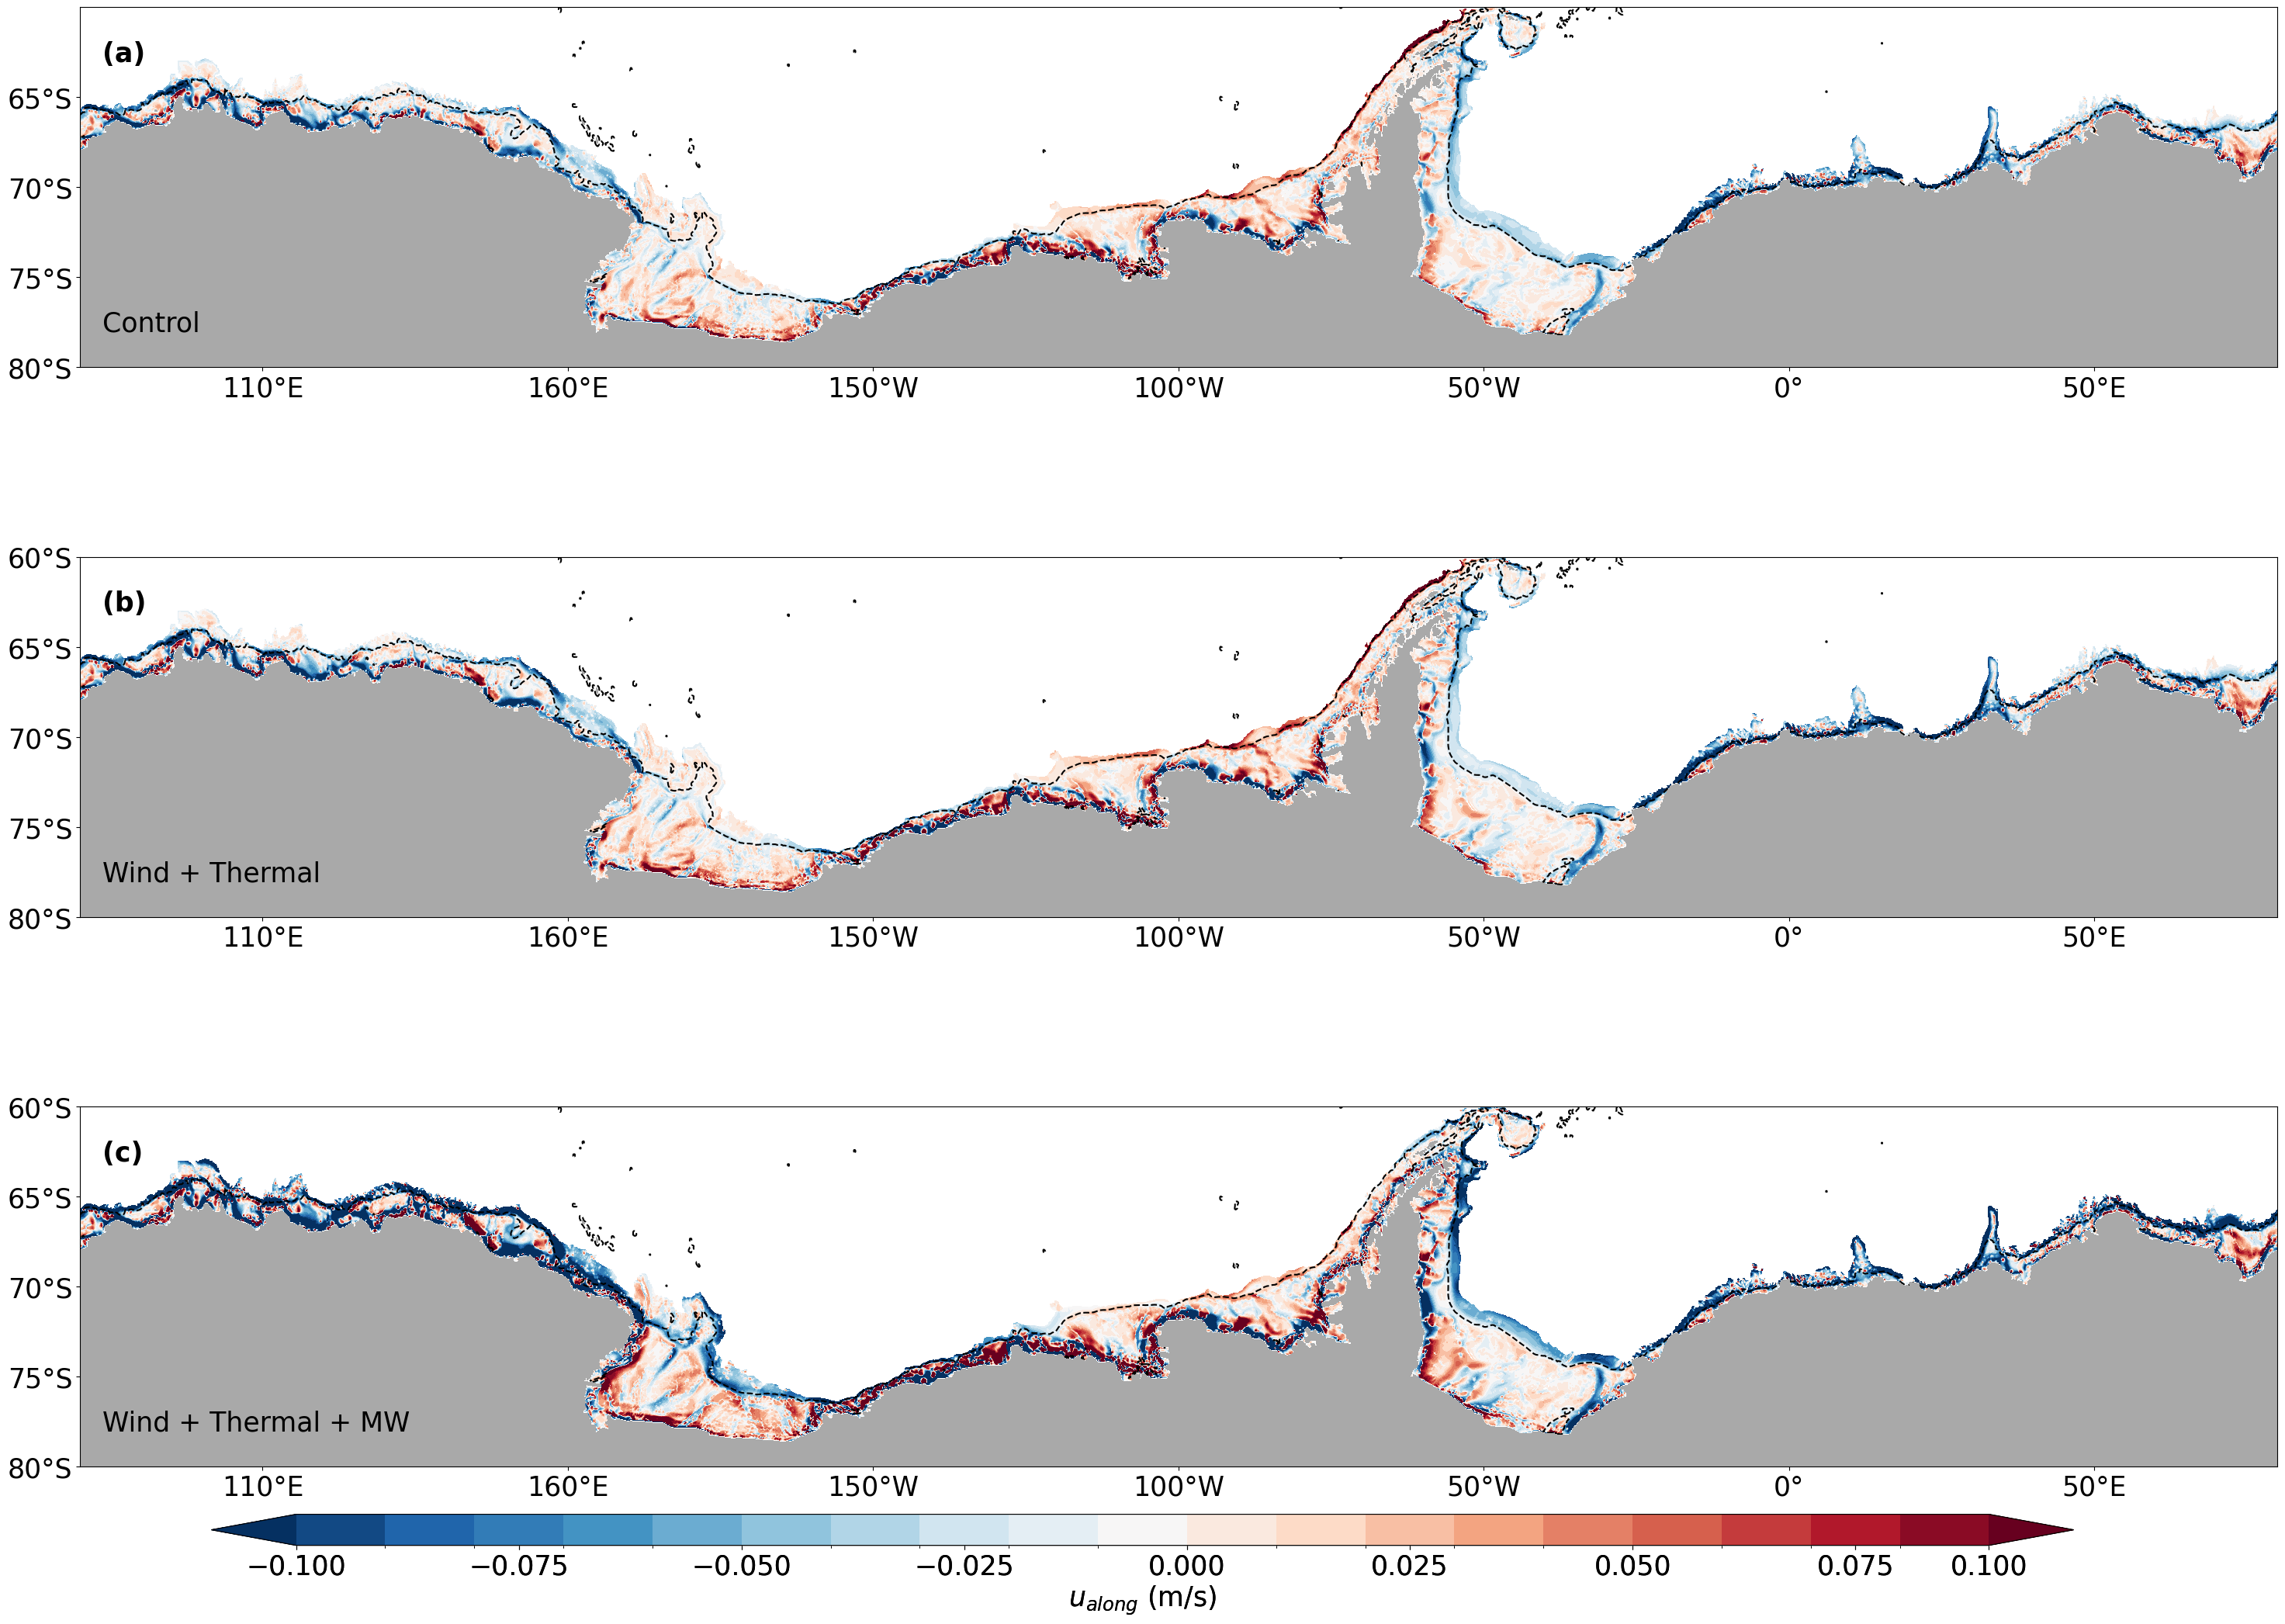

In [55]:
fig, ax = plt.subplots(nrows =3 ,figsize = (30,20))

# accessom2-01
cmap = ualong_decademean_ctrl.u_along.isel(decade = 4).plot.contourf(levels  = np.arange(-0.1,0.1,0.01), add_colorbar = False, ax = ax[0])
#cs = hu_region.where(hu_region < 2600).plot.contour(levels  = [2500], color = 'k', ax = ax[0])
#changeline_cs('solid')
cs = hu_region.plot.contour(levels  = [1000], color = 'k', ax = ax[0], linestyle = 'dashed') #conventional definition for ASC
changeline_cs('dashed')
ax[0].set_ylabel('')
ax[0].contourf(hu.xu_ocean, land_mask_lat, land_mask_masked, colors='darkgrey', zorder=2)
ax[1].text(0.01,0.1,'Control',transform=ax[0].transAxes)
ax[0].set_xlabel('')
ax[0].text(0.01,0.85,'(a)', transform=ax[0].transAxes, fontweight = 'bold')



cmap = (ualong_decademean_wthp.u_along).isel(decade = 4).plot.contourf(levels  = np.arange(-0.1,0.1,0.01), add_colorbar = False, ax = ax[1])
#np.flip(deptho, 0).plot.contour(levels  = np.arange(0,4000,500), cmap = 'gray_r' , ax = ax[1]) # shallow is dark ' Greys deep is dark
cs = hu_region.plot.contour(levels  = [1000], color = 'k', ax = ax[1], linestyle = 'dashed') #conventional definition for ASC
changeline_cs('dashed')

ax[1].contourf(hu.xu_ocean, land_mask_lat, land_mask_masked, colors='darkgrey', zorder=2)
ax[1].set_ylim([-80,-60])
ax[1].text(0.01,0.1,'Wind + Thermal',transform=ax[1].transAxes)
ax[1].set_ylabel('')
ax[1].set_xlabel('')
ax[1].text(0.01,0.85,'(b)', transform=ax[1].transAxes, fontweight = 'bold')

cb_ax = fig.add_axes([0.1, -0.01, 0.8, 0.02])
cbar = plt.colorbar(cmap, label = '$u_{along}$ (m/s)', orientation = 'horizontal', cax = cb_ax, pad = 0.1)
cbar.set_ticks(np.arange(-0.1,0.125,0.025))


cmap = (ualong_decademean_wthmp.u_along).isel(decade = 4).plot.contourf(levels  = np.arange(-0.1,0.1,0.01), add_colorbar = False, ax = ax[2])
#np.flip(deptho, 0).plot.contour(levels  = np.arange(0,4000,500), cmap = 'gray_r' , ax = ax[1]) # shallow is dark ' Greys deep is dark
cs = hu_region.plot.contour(levels  = [1000], color = 'k', ax = ax[2], linestyle = 'dashed') #conventional definition for ASC
changeline_cs('dashed')

ax[2].contourf(hu.xu_ocean, land_mask_lat, land_mask_masked, colors='darkgrey', zorder=2)
ax[2].set_ylim([-80,-60])
ax[2].text(0.01,0.1,'Wind + Thermal + MW ',transform=ax[2].transAxes)
ax[2].set_ylabel('')
ax[2].set_xlabel('')
ax[2].text(0.01,0.85,'(c)', transform=ax[2].transAxes, fontweight = 'bold')

cb_ax = fig.add_axes([0.1, -0.01, 0.8, 0.02])
cbar = plt.colorbar(cmap, label = '$u_{along}$ (m/s)', orientation = 'horizontal', cax = cb_ax, pad = 0.01)
cbar.set_ticks(np.arange(-0.1,0.125,0.025))

for box in range(3):
    ax[box].yaxis.set_major_formatter(LatitudeFormatter())
    ax[box].xaxis.set_major_formatter(LongitudeFormatter())


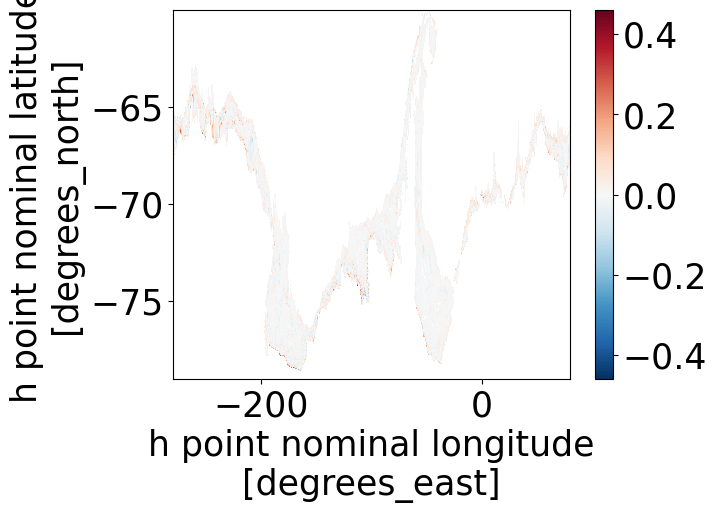

In [28]:
## saving diff as DataArray
u_along_diff = (ualong_mean_005_ave_01.values - ualong_mean_panan01.__xarray_dataarray_variable__.values)
u_along_da = xr.DataArray(u_along_diff, coords = {'xh': ualong_mean_panan01.xh, 'yh': ualong_mean_panan01.yh})
u_along_da.where(cluster_mask_panan01.__xarray_dataarray_variable__ == True).T.plot()

In [30]:
lat_slice_ross = slice(-80, -65)
lon_slice_ross = slice(-200, -150)
lat_slice_WA = slice(-77, -65) # -80
lon_slice_WA = slice(-130, -70)
lat_slice_WEA = slice(-75, -65) #-80
lon_slice_WEA = slice(-25, 40)
lat_slice_east = slice(-67, -63)
lon_slice_east = slice(-270, -230)

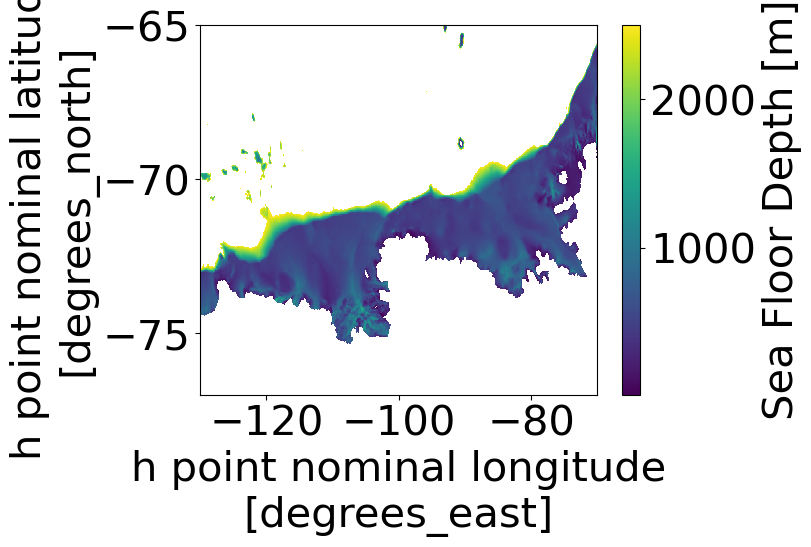

In [43]:
deptho.where(mask_bath_slopeshelf_o == True).sel(xh = lon_slice_WA, yh = lat_slice_WA).plot()

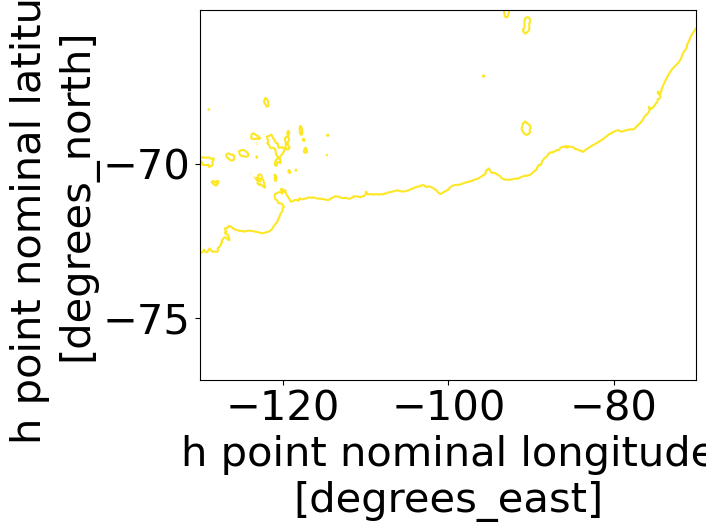

In [54]:
cs = deptho.sel(xh = lon_slice_WA, yh = lat_slice_WA).plot.contour(levels  = [2500], color = 'k', lw = 5) 


In [33]:
deptho = cc.querying.getvar(expt='panant-005-zstar-ACCESSyr2', variable='deptho', 
                          session=session, frequency='static',
                          attrs={'cell_methods': 'area:mean yh:mean xh:mean time: point'}, n=1)#.sel(yu_ocean = slice(-70,-50))


In [34]:
deptho01 = cc.querying.getvar(expt='panant-01-zstar-ACCESSyr2', variable='deptho', 
                          session=session, frequency='static',
                          attrs={'cell_methods': 'area:mean yh:mean xh:mean time: point'}, n=1)#.sel(yu_ocean = slice(-70,-50))


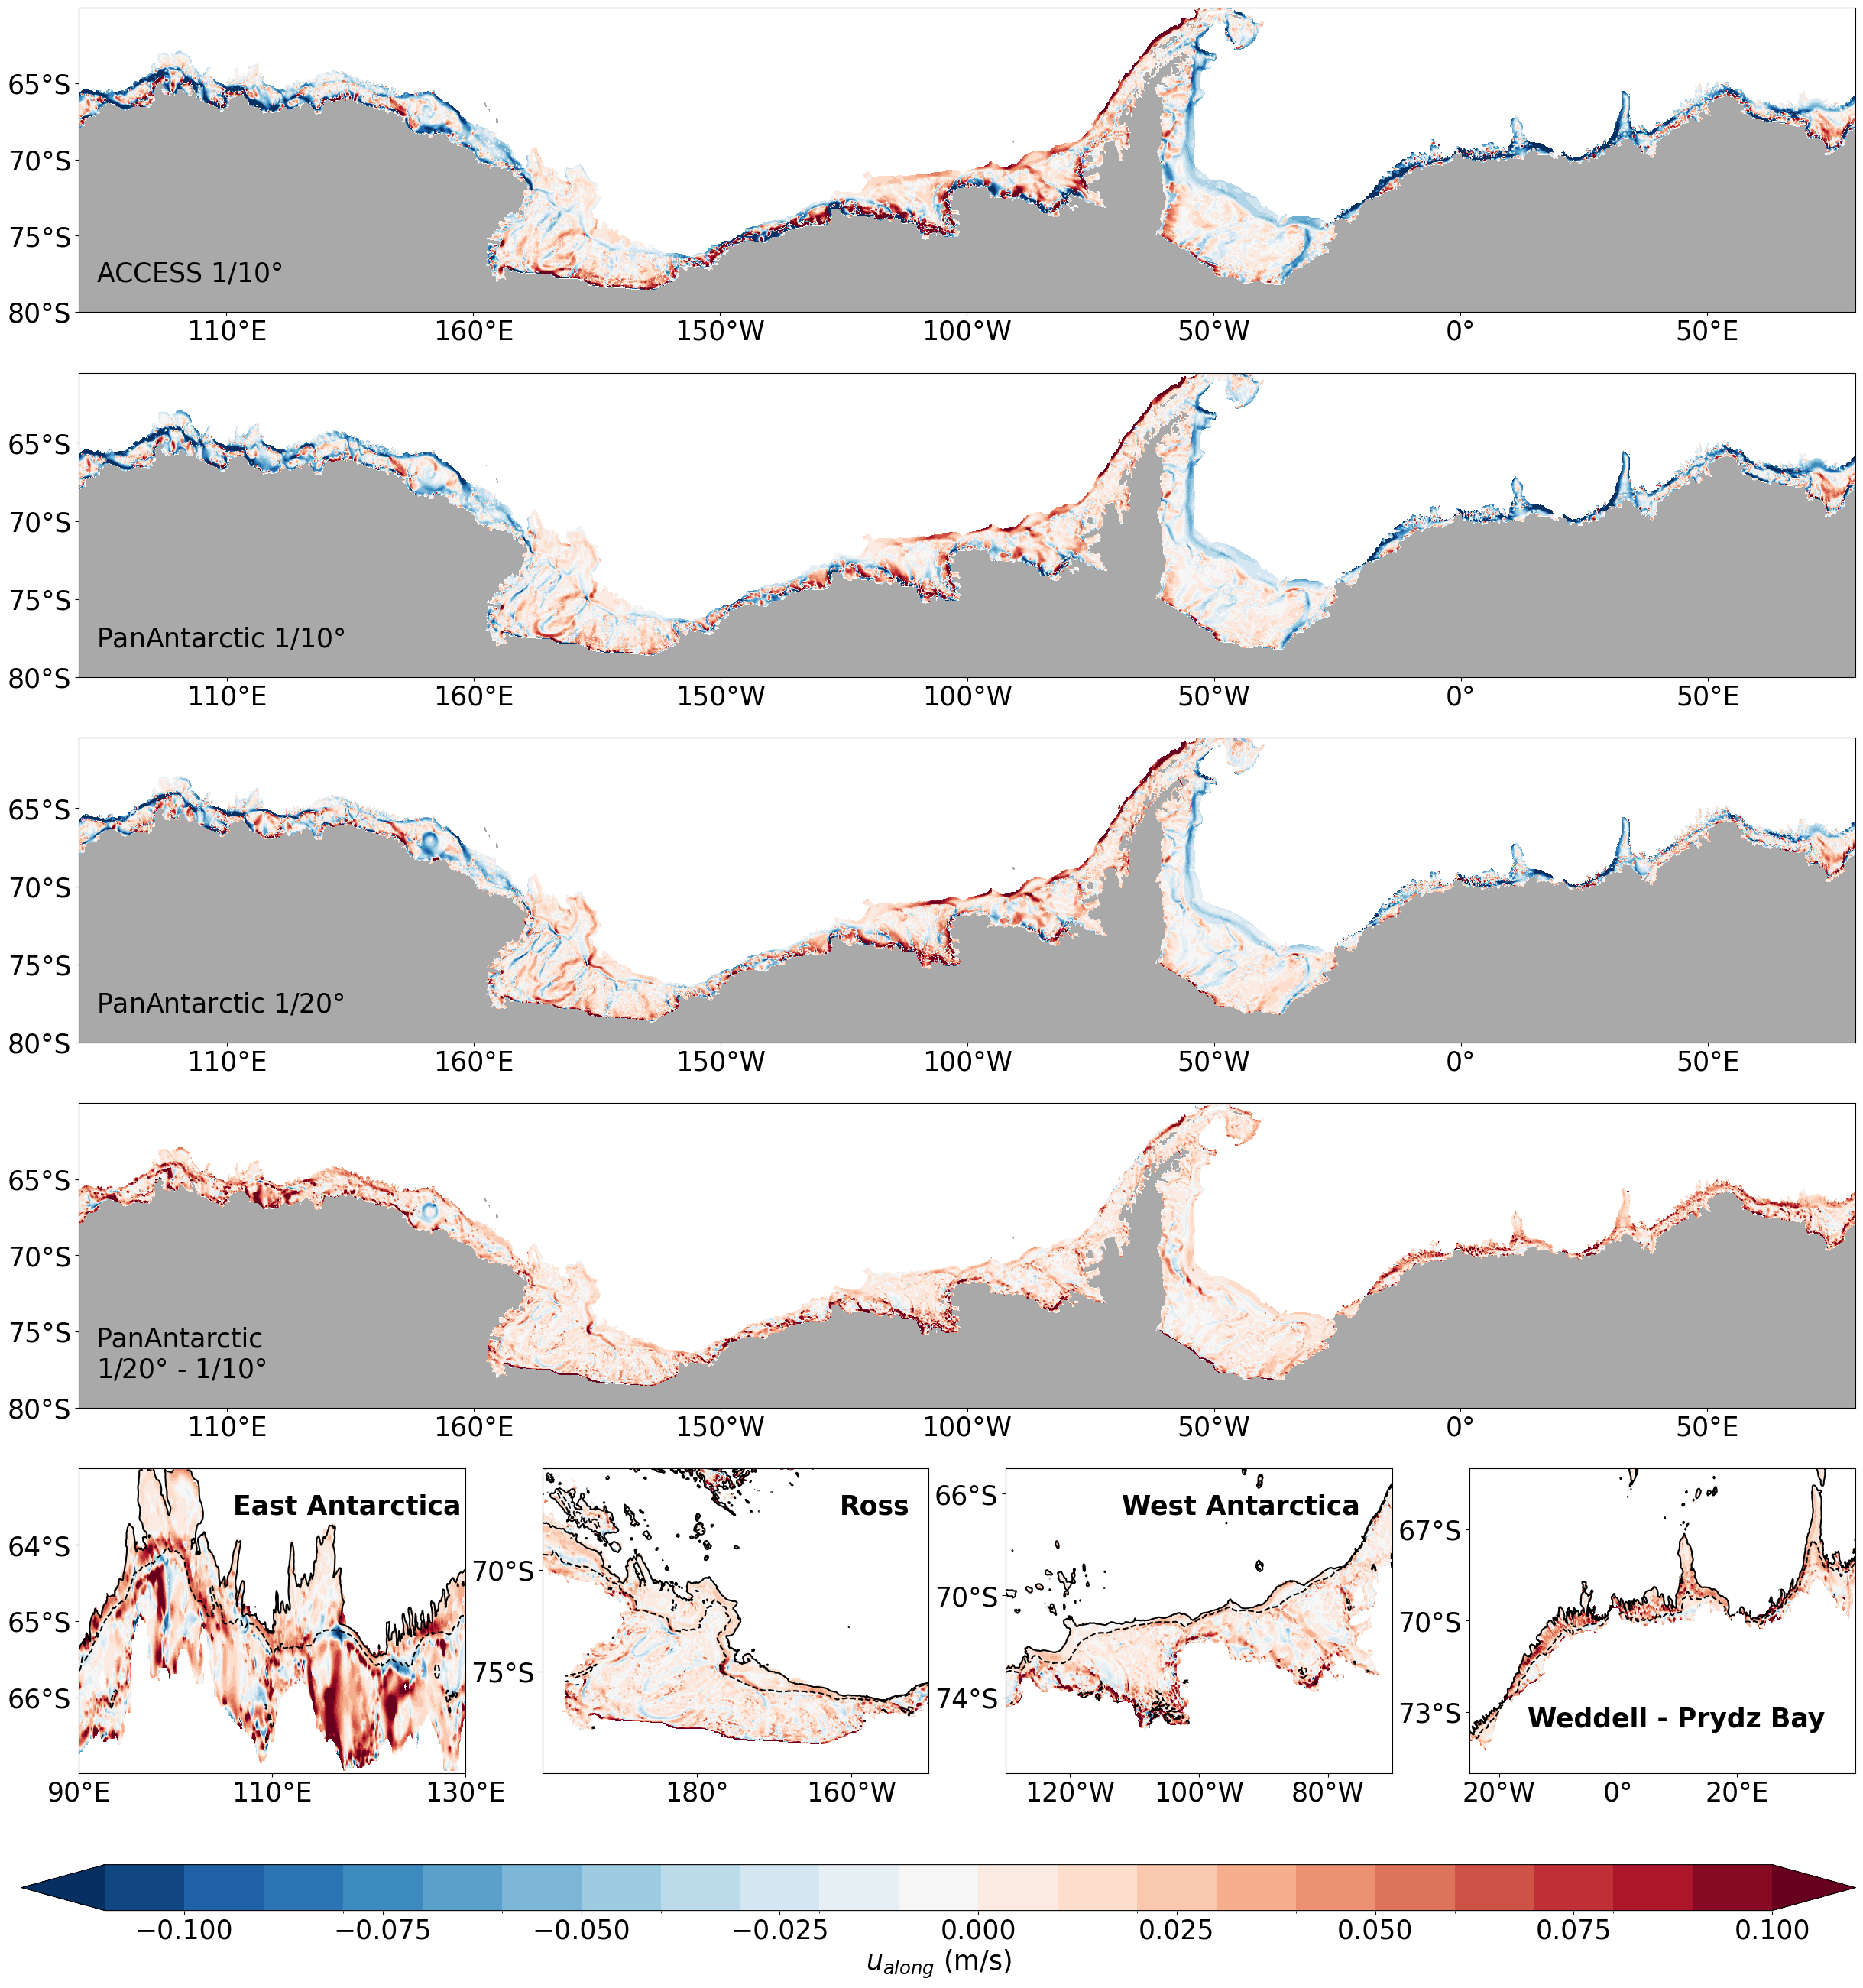

In [37]:
#### PLOTTING WITH REGIONAL
#fig, ax = plt.subplots(nrows =4 ,figsize = (30,23))
fig, ax = plt.subplot_mosaic("AAAA;BBBB;CCCC;DDDD;EFGH", figsize = (30,30))

# accessom2-01
cmap = ualong_mean_01.u_along.where(cluster_mask_access.__xarray_dataarray_variable__ == True).plot.contourf(levels  = np.arange(-0.1,0.1,0.01), add_colorbar = False, ax = ax['A'])
#hu_region.plot.contour(levels  = np.arange(0,4000,500), cmap = 'gray_r' , ax = ax[0]) # shallow is dark ' Greys deep is dark

ax['A'].contourf(hu.xu_ocean, land_mask_lat, land_mask_masked, colors='darkgrey', zorder=2)
ax['A'].text(0.01,0.1,'ACCESS 1/10$\degree$',transform=ax['A'].transAxes)
#ax['A'].text(0.01,0.85,'(a)', transform=ax['A'].transAxes, fontweight = 'bold')
ax['A'].set_ylabel('')
ax['A'].set_xlabel('')

cmap = ualong_mean_panan01.__xarray_dataarray_variable__.where(cluster_mask_panan01.__xarray_dataarray_variable__ == True).T.plot.contourf(levels  = levels_ualong, add_colorbar = False, ax = ax['B'])
#np.flip(deptho, 0).plot.contour(levels  = np.arange(0,4000,500), cmap = 'gray_r' , ax = ax[1]) # shallow is dark ' Greys deep is dark

ax['B'].set_ylabel('')
ax['B'].contourf(deptho01.xh, land_mask_lat_panan01, land_mask_masked_panan01, colors='darkgrey', zorder=2)
ax['B'].set_ylim([-80,-60.5])
ax['B'].text(0.01,0.1,'PanAntarctic 1/10$\degree$',transform=ax['B'].transAxes)
#ax['B'].text(0.01,0.85,'(b)', transform=ax['B'].transAxes, fontweight = 'bold')
ax['B'].set_xlabel('')

cmap = ualong_mean_005.where(cluster_mask_panan005.__xarray_dataarray_variable__ == True).T.plot.contourf(levels  = levels_ualong, add_colorbar = False, ax = ax['C'])
#np.flip(deptho, 0).plot.contour(levels  = np.arange(0,4000,500), cmap = 'gray_r' , ax = ax[1]) # shallow is dark ' Greys deep is dark

ax['C'].set_ylabel('')
ax['C'].contourf(deptho.xh, land_mask_lat_005, land_mask_masked_005, colors='darkgrey', zorder=2)
ax['C'].set_ylim([-80,-60.5])
ax['C'].text(0.01,0.1,'PanAntarctic 1/20$\degree$',transform=ax['C'].transAxes)
ax['C'].set_xlabel('')
#ax['C'].text(0.01,0.85,'(c)', transform=ax['C'].transAxes, fontweight = 'bold')


#cs= ax['D'].contourf(hu.xu_ocean, land_mask_lat, u_along_da.where(cluster_mask_panan01.__xarray_dataarray_variable__ == True).T, levels = levels_ualong,cmap = cmocean.cm.balance)
cmap = u_along_da.where(cluster_mask_panan01.__xarray_dataarray_variable__ == True).T.plot.contourf(levels  = levels_ualong, add_colorbar = False, ax = ax['D'])
ax['D'].set_ylabel('')

ax['D'].contourf(hu.xu_ocean, land_mask_lat, land_mask_masked, colors='darkgrey', zorder=2) ##access land mask fyi
ax['D'].text(0.01,0.1,'PanAntarctic \n1/20$\degree$ - 1/10$\degree$', transform=ax['D'].transAxes)
#ax['D'].text(0.01,0.85,'(d)', transform=ax['D'].transAxes, fontweight = 'bold')
#ax['D'].set_ylabel('Latitude ($\degree$S)')
ax['D'].set_xlabel('')




### REGIONAL

cmap = u_along_da.where(mask_bath_slopeshelf_o01 == True).sel(xh = lon_slice_east, yh = lat_slice_east).T.plot.contourf(levels  = levels_ualong, add_colorbar = False, ax = ax['E'])
cs = deptho.sel(xh = lon_slice_east, yh = lat_slice_east).plot.contour(levels  = [2500], color = 'k', lw = 5, ax = ax['E']) 
changeline_cs('solid')
cs = deptho.sel(xh = lon_slice_east, yh = lat_slice_east).plot.contour(levels  = [1000], color = 'k', lw = 5, ax = ax['E'], linestyle = 'dashed') #conventional definition for ASC
changeline_cs('dashed')

ax['E'].set_xticks([-270,-250, -230])
ax['E'].set_xlabel('')
ax['E'].set_ylabel('')
ax['E'].text(0.4,0.85,'East Antarctica', transform=ax['E'].transAxes, fontweight = 'bold')
#ax['E'].text(0.01,0.03,'(e)', transform=ax['E'].transAxes, fontweight = 'bold')


cmap = u_along_da.where(mask_bath_slopeshelf_o01 == True).sel(xh = lon_slice_ross, yh = lat_slice_ross).T.plot.contourf(levels  = levels_ualong, add_colorbar = False, ax = ax['F'])
cs = deptho.sel(xh = lon_slice_ross, yh = lat_slice_ross).plot.contour(levels  = [2500], color = 'k', lw = 5, ax = ax['F']) 
changeline_cs('solid')
cs = deptho.sel(xh = lon_slice_ross, yh = lat_slice_ross).plot.contour(levels  = [1000], color = 'k', lw = 5, ax = ax['F'], linestyle = 'dashed') #conventional definition for ASC
changeline_cs('dashed')

ax['F'].set_xlabel('')
ax['F'].set_ylabel('')
ax['F'].text(0.77,0.85,'Ross', transform=ax['F'].transAxes, fontweight = 'bold')
#ax['F'].text(0.01,0.03,'(f)', transform=ax['F'].transAxes, fontweight = 'bold')


cmap = u_along_da.where(mask_bath_slopeshelf_o01 == True).sel(xh = lon_slice_WA, yh = lat_slice_WA).T.plot.contourf(levels  = levels_ualong, add_colorbar = False, ax = ax['G'])
cs = deptho.sel(xh = lon_slice_WA, yh = lat_slice_WA).plot.contour(levels  = [2500], color = 'k', lw = 5, ax = ax['G']) 
changeline_cs('solid')
cs = deptho.sel(xh = lon_slice_WA, yh = lat_slice_WA).plot.contour(levels  = [1000], color = 'k', lw = 5, ax = ax['G']) #conventional definition for ASC
changeline_cs('dashed')

ax['G'].set_yticks([-74,-70,-66])
ax['G'].set_xlabel('')
ax['G'].set_ylabel('')
ax['G'].text(0.3,0.85,'West Antarctica', transform=ax['G'].transAxes, fontweight = 'bold')
#ax['G'].text(0.01,0.03,'(g)', transform=ax['G'].transAxes, fontweight = 'bold')


cmap = u_along_da.where(mask_bath_slopeshelf_o01 == True).sel(xh = lon_slice_WEA, yh = lat_slice_WEA).T.plot.contourf(levels  = levels_ualong, add_colorbar = False, ax = ax['H'])
cs = deptho.sel(xh = lon_slice_WEA, yh = lat_slice_WEA).plot.contour(levels  = [2500], color = 'k', lw = 5, ax = ax['H']) 
changeline_cs('solid')
cs = deptho.sel(xh = lon_slice_WEA, yh = lat_slice_WEA).plot.contour(levels  = [1000], color = 'k', lw = 5, ax = ax['H'], linestyle = 'dashed') #conventional definition for ASC
changeline_cs('dashed')

    
ax['H'].set_xlabel('')
ax['H'].set_ylabel('')
ax['H'].set_yticks([-73,-70,-67])

ax['H'].text(0.15,0.15,'Weddell - Prydz Bay', transform=ax['H'].transAxes, fontweight = 'bold')
#ax['H'].text(0.01,0.03,'(h)', transform=ax['H'].transAxes, fontweight = 'bold')

#fig.supxlabel('Longitude', y = 0.0725)

for letter in list(map(chr, range(ord('A'), ord('H')+1))):
    ax[letter].yaxis.set_major_formatter(LatitudeFormatter())
    ax[letter].xaxis.set_major_formatter(LongitudeFormatter())
    
#plt.tight_layout()

cb_ax = fig.add_axes([0.1, 0.05, 0.8, 0.02]) #[0.1, -0.01, 0.8, 0.02])
cbar = plt.colorbar(cmap, label = '$u_{along}$ (m/s)', orientation = 'horizontal', cax = cb_ax)
cbar.set_ticks(np.arange(-0.1,0.125,0.025))


#(ualong_mean_005_ave_01).where(cluster_mask_panan01.__xarray_dataarray_variable__ == True).T
#plt.savefig('Fig_ulong_mip_3.png', dpi = 600)
#plt.savefig('FigN_ualong_circ.pdf')
plt.savefig('FigN_ualong_circ_bline_label.png', dpi = 600)

In [48]:
land_mask_lat_panan01.shape

(1690,)

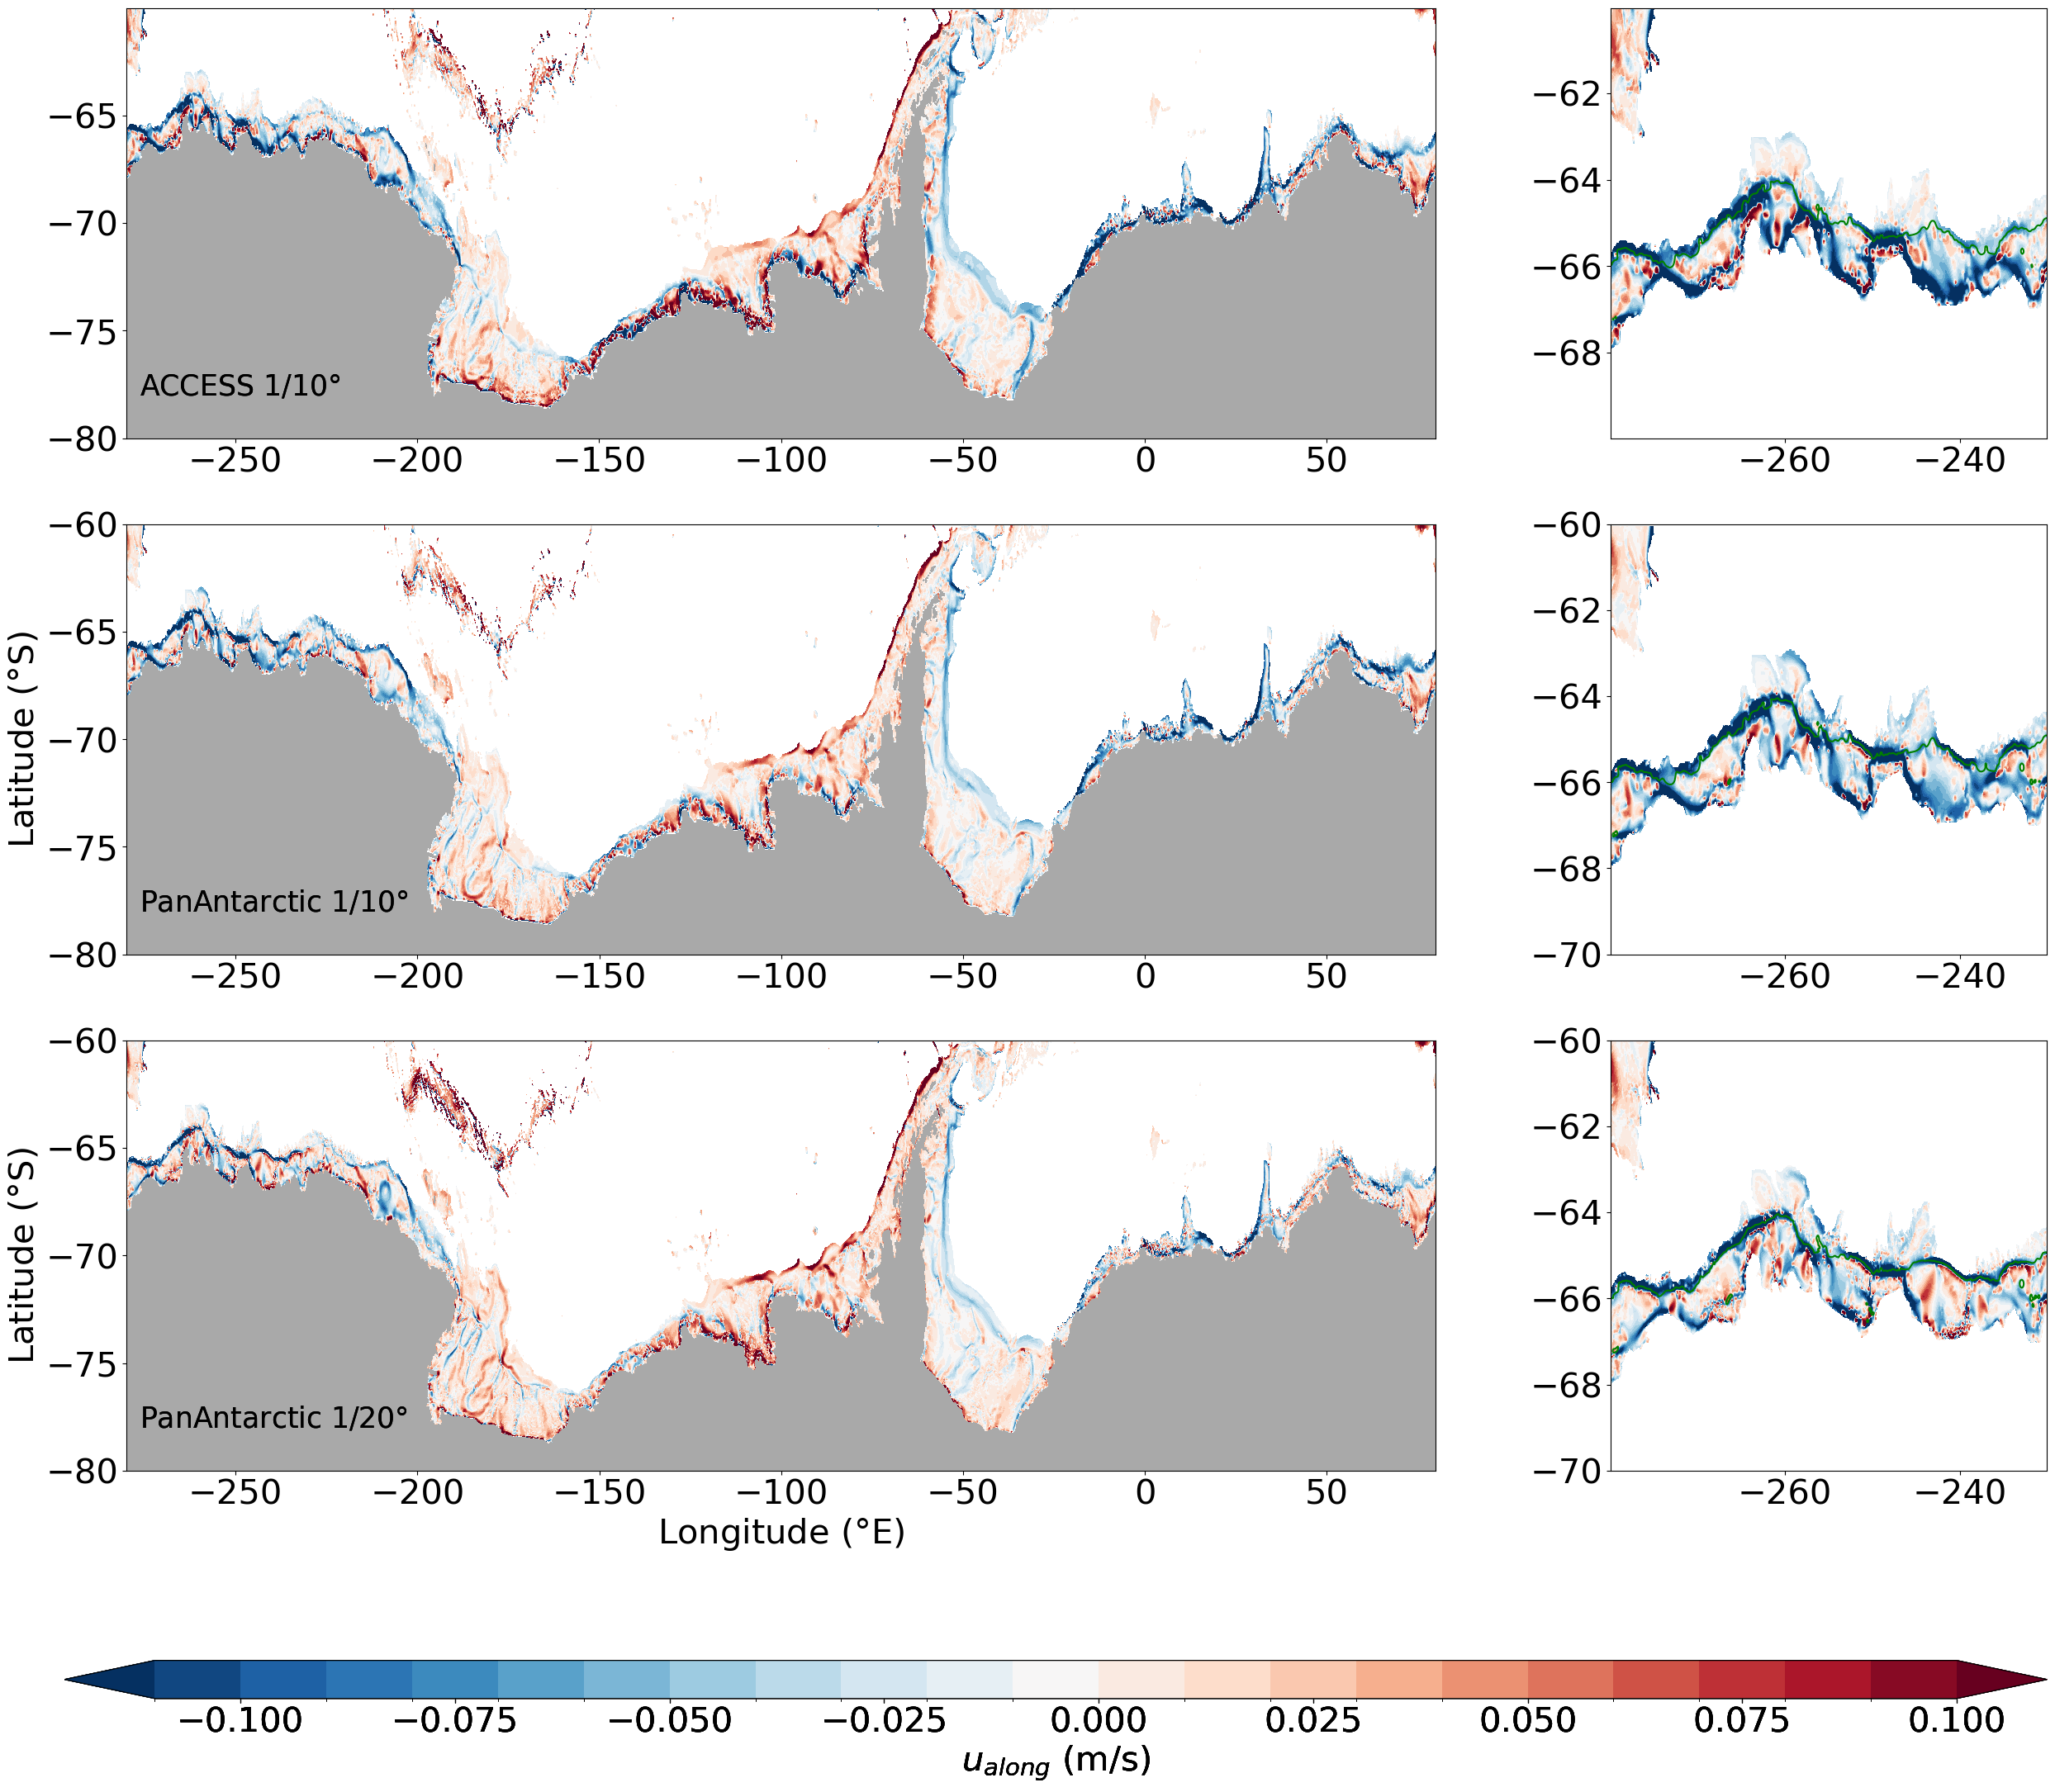

In [44]:
fig, ax = plt.subplots(nrows =3, ncols = 2 ,figsize = (30,23),width_ratios=[3, 1])

levels_ualong = np.arange(-0.11,0.11,0.01)
# accessom2-01
cmap = ualong_mean_01.u_along.where(mask_bath_slopeshelf == True).plot.contourf(levels  = np.arange(-0.1,0.1,0.01), add_colorbar = False, ax = ax[0,0])
#hu_region.plot.contour(levels  = np.arange(0,4000,500), cmap = 'gray_r' , ax = ax[0]) # shallow is dark ' Greys deep is dark
'''
cs = hu_region.where(mask_bath_slopeshelf == True).plot.contour(levels  = [2500], color = 'k', lw = 3, ax = ax[0]) 
# masked 600-2500m without canyons to get intrinsic variability in EKE
cs.cmap.set_over('red')

cs = hu_region.where(mask_bath_slopeshelf == True).plot.contour(levels  = [600], color = 'r', lw = 3, ax = ax[0]) 
cs.cmap.set_over('red')

cs = hu_region.where(mask_bath_slopeshelf == True).plot.contour(levels  = [1000], color = 'b', lw = 5, ax = ax[0]) #conventional definition for ASC
cs.cmap.set_over('b')
'''
ax[0,0].contourf(hu.xu_ocean, land_mask_lat, land_mask_masked, colors='darkgrey', zorder=2)
ax[0,0].text(0.01,0.1,'ACCESS 1/10$\degree$',transform=ax[0,0].transAxes)

ax[0,0].set_ylabel('')
ax[0,0].set_xlabel('')


cmap = ualong_mean_panan01.__xarray_dataarray_variable__.where(mask_bath_slopeshelf_o01 == True).T.plot.contourf(levels  = levels_ualong, add_colorbar = False, ax = ax[1,0])
#np.flip(deptho, 0).plot.contour(levels  = np.arange(0,4000,500), cmap = 'gray_r' , ax = ax[1]) # shallow is dark ' Greys deep is dark

ax[1,0].set_ylabel('Latitude ($\degree$S)')
ax[1,0].contourf(deptho01.xh, land_mask_lat_panan01, land_mask_masked_panan01, colors='darkgrey', zorder=2)
ax[1,0].set_ylim([-80,-60])
ax[1,0].text(0.01,0.1,'PanAntarctic 1/10$\degree$',transform=ax[1,0].transAxes)

ax[1,0].set_xlabel('')
cb_ax = fig.add_axes([0.1, -0.01, 0.8, 0.02])
cbar = plt.colorbar(cmap, label = '$u_{along}$ (m/s)', orientation = 'horizontal', cax = cb_ax, pad = 0.1)
cbar.set_ticks(np.arange(-0.1,0.125,0.025))



cmap = ualong_mean_005.where(mask_bath_slopeshelf_o == True).T.plot.contourf(levels  = levels_ualong, add_colorbar = False, ax = ax[2,0])
#np.flip(deptho, 0).plot.contour(levels  = np.arange(0,4000,500), cmap = 'gray_r' , ax = ax[1]) # shallow is dark ' Greys deep is dark

ax[2,0].set_ylabel('Latitude ($\degree$S)')
ax[2,0].contourf(deptho.xh, land_mask_lat_005, land_mask_masked_005, colors='darkgrey', zorder=2)
ax[2,0].set_ylim([-80,-60])
ax[2,0].text(0.01,0.1,'PanAntarctic 1/20$\degree$',transform=ax[2,0].transAxes)

ax[2,0].set_xlabel('Longitude ($\degree$E)')
cb_ax = fig.add_axes([0.1, -0.01, 0.8, 0.02])
cbar = plt.colorbar(cmap, label = '$u_{along}$ (m/s)', orientation = 'horizontal', cax = cb_ax, pad = 0.1)
cbar.set_ticks(np.arange(-0.1,0.125,0.025))
####
## REGIONAL 
####

# accessom2-01
cmap = ualong_mean_01.u_along.where(mask_bath_slopeshelf == True).sel(xu_ocean = slice(-280,-230), yu_ocean = slice(-70,-50)).plot.contourf(levels  = np.arange(-0.1,0.1,0.01), add_colorbar = False, ax = ax[0,1])
#hu_region.plot.contour(levels  = np.arange(0,4000,500), cmap = 'gray_r' , ax = ax[0]) # shallow is dark ' Greys deep is dark

#ax[0,1].contourf(hu.xu_ocean, land_mask_lat, land_mask_masked, colors='darkgrey', zorder=2)
ax[0,1].text(0.01,0.1,'ACCESS 1/10$\degree$',transform=ax[0,0].transAxes)

cs = hu_region.where(mask_bath_slopeshelf == True).sel(xu_ocean = slice(-280,-230), yu_ocean = slice(-70,-50)).plot.contour(levels  = [2500], color = 'r', lw = 3, ax = ax[0,1]) 
# masked 600-2500m without canyons to get intrinsic variability in EKE
cs.cmap.set_over('red')

cs = hu_region.where(mask_bath_slopeshelf == True).sel(xu_ocean = slice(-280,-230), yu_ocean = slice(-70,-50)).plot.contour(levels  = [1000], color = 'b', lw = 5, ax = ax[0,1]) #conventional definition for ASC
cs.cmap.set_over('g')

ax[0,1].set_xlabel('')
ax[0,1].set_ylabel('')

cmap = ualong_mean_panan01.__xarray_dataarray_variable__.where(mask_bath_slopeshelf_o01 == True).sel(xh = slice(-280,-230), yh = slice(-70,-50)).T.plot.contourf(levels  = levels_ualong, add_colorbar = False, ax = ax[1,1])
#np.flip(deptho, 0).plot.contour(levels  = np.arange(0,4000,500), cmap = 'gray_r' , ax = ax[1]) # shallow is dark ' Greys deep is dark
#ax[1,1].contourf(deptho01.xh, land_mask_lat_panan01, land_mask_masked_panan01.sel(xh = slice(-280,-230), yh = slice(-70,-50)), colors='darkgrey', zorder=2)
ax[1,1].text(0.01,0.1,'PanAntarctic 1/10$\degree$',transform=ax[1,0].transAxes)

cb_ax = fig.add_axes([0.1, -0.01, 0.8, 0.02])
cbar = plt.colorbar(cmap, label = '$u_{along}$ (m/s)', orientation = 'horizontal', cax = cb_ax, pad = 0.1)
cbar.set_ticks(np.arange(-0.1,0.125,0.025))

cs = deptho01.where(mask_bath_slopeshelf_o01 == True).sel(xh = slice(-280,-230), yh = slice(-70,-50)).plot.contour(levels  = [2500], color = 'r', lw = 3, ax = ax[1,1]) 
# masked 600-2500m without canyons to get intrinsic variability in EKE
cs.cmap.set_over('red')

cs = deptho01.where(mask_bath_slopeshelf_o01 == True).sel(xh = slice(-280,-230), yh = slice(-70,-50)).plot.contour(levels  = [1000], color = 'b', lw = 5, ax = ax[1,1]) #conventional definition for ASC
cs.cmap.set_over('g')
ax[1,1].set_xlabel('')
ax[1,1].set_ylabel('')
ax[1,1].set_ylim([-70,-60])

cmap = ualong_mean_005.where(mask_bath_slopeshelf_o == True).sel(xh = slice(-280,-230), yh = slice(-70,-50)).T.plot.contourf(levels  = levels_ualong, add_colorbar = False, ax = ax[2,1])
#np.flip(deptho, 0).plot.contour(levels  = np.arange(0,4000,500), cmap = 'gray_r' , ax = ax[1]) # shallow is dark ' Greys deep is dark
#ax[2,1].contourf(deptho.xh, land_mask_lat_005, land_mask_masked_005.sel(xh = slice(-280,-230), yh = slice(-70,-50)), colors='darkgrey', zorder=2)
ax[2,1].text(0.01,0.1,'PanAntarctic 1/20$\degree$',transform=ax[2,0].transAxes)


cs = deptho.where(mask_bath_slopeshelf_o == True).sel(xh = slice(-280,-230), yh = slice(-70,-50)).plot.contour(levels  = [2500], color = 'r', lw = 3, ax = ax[2,1]) 
# masked 600-2500m without canyons to get intrinsic variability in EKE
cs.cmap.set_over('red')

cs = deptho.where(mask_bath_slopeshelf_o == True).sel(xh = slice(-280,-230), yh = slice(-70,-50)).plot.contour(levels  = [1000], color = 'b', lw = 5, ax = ax[2,1]) #conventional definition for ASC
cs.cmap.set_over('g')

ax[2,1].set_xlabel('')
ax[2,1].set_ylabel('')
ax[2,1].set_ylim([-70,-60])

cb_ax = fig.add_axes([0.1, -0.01, 0.8, 0.02])
cbar = plt.colorbar(cmap, label = '$u_{along}$ (m/s)', orientation = 'horizontal', cax = cb_ax, pad = 0.1)
cbar.set_ticks(np.arange(-0.1,0.125,0.025))

#plt.tight_layout()
#plt.savefig('Fig_ulong_mip_3.png', dpi = 600)

In [54]:
ualong_mean_panan01

<xarray.Dataset>
Dimensions:                        (xh: 9000, yh: 1320)
Coordinates:
  * xh                             (xh) float64 -280.0 -279.9 ... 79.95 79.97
  * yh                             (yh) float64 -79.0 -78.99 ... -60.03 -60.01
Data variables:
    __xarray_dataarray_variable__  (xh, yh) float64 dask.array<chunksize=(9000, 1320), meta=np.ndarray>

In [60]:
cmap = ualong_mean_panan01.__xarray_dataarray_variable__.where(mask_bath_slopeshelf_o01 == True).sel(xh = slice(-280,-230), yh = slice(-70,-50)).T#.plot.contourf(levels  = levels_ualong, add_colorbar = False)
cmap

<xarray.DataArray '__xarray_dataarray_variable__' (yh: 227, xh: 0)>
dask.array<transpose, shape=(227, 0), dtype=float64, chunksize=(160, 0), chunktype=numpy.ndarray>
Coordinates:
  * xh       (xh) float64 
  * yh       (yh) float64 -70.0 -69.96 -69.92 -69.87 ... -60.15 -60.1 -60.05

In [65]:
ualong_mean_panan01

<xarray.Dataset>
Dimensions:                        (xh: 9000, yh: 1320)
Coordinates:
  * xh                             (xh) float64 -280.0 -279.9 ... 79.95 79.97
  * yh                             (yh) float64 -79.0 -78.99 ... -60.03 -60.01
Data variables:
    __xarray_dataarray_variable__  (xh, yh) float64 dask.array<chunksize=(9000, 1320), meta=np.ndarray>

In [148]:
np.arange(-0.1,0.125,0.025)

array([-1.00000000e-01, -7.50000000e-02, -5.00000000e-02, -2.50000000e-02,
       -2.77555756e-17,  2.50000000e-02,  5.00000000e-02,  7.50000000e-02,
        1.00000000e-01])

In [ ]:
## submit as a pbs job



In [ ]:
## u_along figure

import cosima_cookbook as cc
from dask.distributed import Client
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import numpy as np
import xarray as xr
import cmocean as cm
import cartopy.crs as ccrs
import cmocean as cm
import glob
import os

import matplotlib.dates as mdates
import datetime
import pandas as pd


from matplotlib import rc
rc('font', **{'size':40})
rc('text', usetex=False)
rc('xtick', labelsize=40) #20 
rc('ytick', labelsize=40) #20
rc('axes', titlesize=40)    # fontsize of the axes title
rc('axes', labelsize=40) #24    # fontsize of the x and y labels

session=cc.database.create_session()
expt = '01deg_jra55v13_ryf9091'

from dask.distributed import Client
import dask

c=Client(local_directory = '/g/data/v45/qo9901/') 
c 

hu = cc.querying.getvar(expt='01deg_jra55v13_ryf9091', variable='hu', 
                          session=session, frequency='static',
                          attrs={'cell_methods': 'time: point'}, n=1).sel(yu_ocean = slice(-70,-50))
hu

# location limits of dataset - choosing slice near totten
#lon_lim = slice(-270, -230) #slice(30, 45)#
lat_lim = slice(-70, -60) #slice(-70, -65)

hu_region = hu.sel( yu_ocean = lat_lim)

import gc
c.run(gc.collect)

## SURFACE ALONG-slope velocity

start_time = '1950-01-01'
end_time = '2179-12-31'
flex_period = slice('1950','2180')
lat_slice  = slice(-70, -60)
depth = 3000

SSH = cc.querying.getvar(expt,'eta_t', session, frequency = '1 daily').sel(yt_ocean = slice(-70,-50))
SSH # no sea_level

patm = 101000 #[Pa, N/m2]
rho0 = 1035 #[kg/m3]
g = 9.81 #[m/s2]
sea_level = SSH + patm/(rho0*g) 

#effective sea level (eta_t + patm/(rho0*g)) on T cells (meter)
sea_level

# load coordinates and grid specifications
geolat_t = cc.querying.getvar(expt, 'geolat_t', session=session, n=1)
geolon_t = cc.querying.getvar(expt, 'geolon_t', session=session, n=1)

dxt = cc.querying.getvar(expt=expt, variable='dxt', session=session, frequency='static', n=1)
dyt = cc.querying.getvar(expt=expt, variable='dyt', session=session, frequency='static', n=1)

dxu = cc.querying.getvar(expt=expt, variable='dxu', session=session, frequency='static', n=1)
dyu = cc.querying.getvar(expt=expt, variable='dyu', session=session, frequency='static', n=1)

import gc
c.run(gc.collect)

sea_level = sea_level.chunk({ 'yt_ocean':69, 'xt_ocean':360, 'time':18250})
sea_level

sea_level_lim = sea_level.sel(  yt_ocean=lat_lim, time = flex_period)

# coordinates
lat_t = geolat_t.sel(yt_ocean=lat_lim)
lon_t = geolon_t.sel(yt_ocean=lat_lim)

dxt_lim = dxt.sel(yt_ocean=lat_lim)
dyt_lim = dyt.sel(yt_ocean=lat_lim)

dxu_lim = dxu.sel(yu_ocean=lat_lim)
dyu_lim = dyu.sel(yu_ocean=lat_lim)

import gc
c.run(gc.collect)

# defining B-grid using xgcm
path_to_folder = '/g/data/ik11/outputs/access-om2-01/01deg_jra55v13_ryf9091/output000/ocean/'
ocean_grid = xr.open_mfdataset(path_to_folder+'ocean_grid.nc', combine='by_coords')

import gc
c.run(gc.collect)

## need to run seperately or it will crash
import xgcm
coordinates = xr.merge([dxt_lim, dyt_lim, dxu_lim, dyu_lim])

vel = xr.merge([coordinates, sea_level_lim.sel(time=flex_period), ocean_grid.sel( yt_ocean=lat_lim, yu_ocean = lat_lim).isel(time = 0)],compat='override')# time is flex_period before

vel

vel.coords['xt_ocean'].attrs.update(axis='X')
vel.coords['xu_ocean'].attrs.update(axis='X', c_grid_axis_shift=0.5, periodic=False)
vel.coords['yt_ocean'].attrs.update(axis='Y')
vel.coords['yu_ocean'].attrs.update(axis='Y', c_grid_axis_shift=0.5)
metrics = {
    ('X',): ['dxt', 'dxu'], # X distances
    ('Y',): ['dyt', 'dyu'], # Y distances
    ('X', 'Y'): ['area_t', 'area_u'] # Areas
}

grid = xgcm.Grid(vel, periodic=False, metrics = metrics,boundary='extend')
grid

def geostrophic_velocity(ds, grid, sea_level='eta_t', stream_func='deltaD', gravity='gu', coriolis='f', delta_names=('dx', 'dy')):

    '''
    calculate geostrophic velocity from sea level
    '''
    
    # surface geostrophic velocity
    detadx = grid.interp(grid.diff(ds[sea_level], 'X', boundary='extend'), 'Y', boundary='extend') / ds[delta_names[0]] # , boundary='extend') for 'X'?
    detady = grid.interp(grid.diff(ds[sea_level], 'Y', boundary='extend'), 'X', boundary='extend') / ds[delta_names[1]]

    ds['ug_s']= - (ds[gravity] / ds[coriolis]) * detady
    ds['vg_s'] = (ds[gravity] / ds[coriolis]) * detadx

    ds['ug_s'].name = 'ug_s'
    ds['ug_s'].attrs['standard_name'] = 'surface_geostrophic_eastward_sea_water_velocity'
    ds['ug_s'].attrs['long_name'] = r'$u_g,s$'
    ds['ug_s'].attrs['units'] = r'$\mathrm{ms}^{-1}$'
    
    ds['vg_s'].name = 'vg_s'
    ds['vg_s'].attrs['standard_name'] = 'surface_geostrophic_northward_sea_water_velocity'
    ds['vg_s'].attrs['long_name'] = r'$v_g,s$'
    ds['vg_s'].attrs['units'] = r'$\mathrm{ms}^{-1}$'
    
    return ds


from gsw import f, grav, p_from_z

lat_t_2d = lat_t.broadcast_like(coordinates.dyt)
z_2d = (-vel.isel(st_ocean=0).st_ocean).broadcast_like(coordinates.dyt)
p_2d = xr.apply_ufunc(p_from_z, z_2d, lat_t_2d, dask='parallelized', output_dtypes=[z_2d.dtype])
p_2d = p_2d.compute()

g = xr.apply_ufunc(grav, lat_t, patm, dask='parallelized') ## CHEKC IF Patm is riht for surface
## not allowed to leave p empty
g.name = 'g'
g.attrs = {'standard_name': 'gravitational_acceleration', 'units':r'$\textrm{ms}^{-2}$', 'long_name': 'gravitational acceleration'}

# Coriolis parameter
fcor, _ = xr.broadcast(f(coordinates.yu_ocean), coordinates.xu_ocean)
fcor.name = 'f'
fcor.attrs = {'standard_name': 'coriolis_parameter', 'units': r'$\textrm{s}^{-1}$', 'long_name': 'Coriolis parameter'}

gu = grid.interp(grid.interp(g, 'X', boundary='extend'), 'Y', boundary='extend') ## interpolated gravity to u grid
gu.name = 'gu'

sl_grd = xr.merge([coordinates, gu, fcor, sea_level_lim.sel(time=flex_period)])
sl_grd


grid

sl_grd = sl_grd.chunk({'yt_ocean':93,'xt_ocean':600})#makexy domain one chunk only

geos_vel = geostrophic_velocity(sl_grd, grid, stream_func=None, delta_names=('dxu', 'dyu'))

# calculating the geostrophic flow speed
Vg = (geos_vel.ug_s**2 + geos_vel.vg_s**2)**(1/2)

#u = cc.querying.getvar(expt, 'u', session, start_time=start_time, end_time=end_time, ncfile="ocean.nc")
u = geos_vel.ug_s.sel(time=slice(start_time,end_time)).sel(yu_ocean=lat_slice).chunk({ 'yu_ocean':69, 'xu_ocean':60, 'time':2500})#.mean('time')
#v = cc.querying.getvar(expt, 'v', session, start_time=start_time, end_time=end_time, ncfile="ocean.nc")
c.run(gc.collect)
v = geos_vel.vg_s.sel(time=slice(start_time,end_time)).sel(yu_ocean=lat_slice).chunk({ 'yu_ocean':69, 'xu_ocean':60, 'time':2500})#.mean('time')


# Load model grid information
path_to_folder = '/g/data/ik11/outputs/access-om2-01/01deg_jra55v13_ryf9091/output000/ocean/'
grid = xr.open_mfdataset(path_to_folder+'ocean_grid.nc', combine='by_coords')

# Give information on the grid: location of u (momentum) and t (tracer) points on B-grid 
ds = xr.merge([hu, grid])
ds.coords['xt_ocean'].attrs.update(axis='X')
ds.coords['xu_ocean'].attrs.update(axis='X', c_grid_axis_shift=0.5)
ds.coords['yt_ocean'].attrs.update(axis='Y')
ds.coords['yu_ocean'].attrs.update(axis='Y', c_grid_axis_shift=0.5)

grid = xgcm.Grid(ds, periodic=['X'])

# Take topographic gradient (simple gradient over one grid cell) and move back to u-grid
dhu_dx = grid.interp( grid.diff(ds.hu, 'X') / grid.interp(ds.dxu, 'X'), 'X')
# In meridional direction, we need to specify what happens at the boundary
dhu_dy = grid.interp( grid.diff(ds.hu, 'Y', boundary='extend') / grid.interp(ds.dyt, 'X'), 'Y', boundary='extend')

# Select latitude slice
dhu_dx = dhu_dx.sel(yu_ocean=lat_lim)
dhu_dy = dhu_dy.sel(yu_ocean=lat_lim)

# Magnitude of the topographic slope (to normalise the topographic gradient)
topographic_slope_magnitude = np.sqrt(dhu_dx**2 + dhu_dy**2)
# Calculate the magnitude of the topographic slope
slope = np.sqrt(dhu_dx**2 + dhu_dy**2)

print('u')

savedir  = '/g/data/v45/qo9901/RYF_plotting/'

u.to_netcdf(savedir + '/u_daily_circ_ssh_lat7060.nc')
v.to_netcdf(savedir + '/v_daily_circ_ssh_lat7060.nc')
dhu_dy.to_netcdf(savedir + '/dhu_dy_circ_lat7060.nc')
dhu_dx.to_netcdf(savedir + '/dhu_dx_circ_lat7060..nc')
slope.to_netcdf(savedir + '/slope_circ_lat7060.nc')



In [18]:
u_mean

<xarray.DataArray 'ug_s' (yu_ocean: 93, xu_ocean: 400)>
dask.array<mean_agg-aggregate, shape=(93, 400), dtype=float64, chunksize=(69, 60), chunktype=numpy.ndarray>
Coordinates:
  * xu_ocean  (xu_ocean) float64 -270.0 -269.9 -269.8 ... -230.3 -230.2 -230.1
  * yu_ocean  (yu_ocean) float64 -66.98 -66.94 -66.9 ... -63.11 -63.07 -63.02
    geolon_c  (yu_ocean, xu_ocean) float32 dask.array<chunksize=(69, 60), meta=np.ndarray>
    geolat_c  (yu_ocean, xu_ocean) float32 dask.array<chunksize=(69, 60), meta=np.ndarray>